In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew,chi2_contingency,mannwhitneyu,shapiro

## 1- Loading Data

In [2]:
path = "../data/pre_prpocessed_dataset.csv"
data = pd.read_csv(path)

In [3]:
data.head()

,account_open_date,age,location,occupation,income_level,fico_score,delinquency_status,charge_off_status,number_of_credit_applications,debt_to_income_ratio,...,number_of_delinquent_accounts,number_of_defaulted_accounts,earliest_credit_account,recent_trade_activity,new_accounts_opened_last_12months,multiple_applications_short_time_period,unusual_submission_pattern,applications_submitted_during_odd_hours,watchlist_blacklist_flag,public_records_flag
0,2023-11-09,56,Los Angeles,Teacher,40099,424.0,108,1,10,3.139572,...,4.0,2,2018-09-11,2024-03-07,3,1,1,0,0,1
1,2022-09-11,69,New York,Engineer,2050,483.0,0,0,1,1.017489,...,3.0,2,2023-03-08,2024-01-28,3,0,1,0,0,0
2,2020-07-12,46,Miami,Engineer,71936,566.0,0,0,1,1.508626,...,2.0,0,2024-04-26,2024-10-03,2,0,0,0,0,0
3,2023-10-26,38,Los Angeles,Banker,6925,740.0,0,0,1,1.659631,...,0.0,0,2022-03-01,2024-01-04,0,0,0,1,0,0
4,2020-10-29,56,Dallas,Accountant,25139,563.0,0,0,1,0.876580,...,1.0,1,2022-09-11,2023-11-21,2,0,0,0,0,0


In [4]:
data.describe()

,age,income_level,fico_score,delinquency_status,charge_off_status,number_of_credit_applications,debt_to_income_ratio,payment_methods_high_risk,max_balance,avg_balance_last_12months,number_of_delinquent_accounts,number_of_defaulted_accounts,new_accounts_opened_last_12months,multiple_applications_short_time_period,unusual_submission_pattern,applications_submitted_during_odd_hours,watchlist_blacklist_flag,public_records_flag
count,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000
mean,46.148488,23717.458062,616.211618,25.252964,0.260670,1.811648,1.477336,0.237404,50462.244115,33472.154979,1.209247,0.499555,1.383669,0.258447,0.207024,0.314908,0.126260,0.201986
std,16.411338,21872.292686,130.181643,42.736714,0.439033,1.934514,0.684346,0.425523,50151.749003,21801.235282,1.562802,0.730357,1.594867,0.437813,0.405203,0.464514,0.332166,0.401511
min,18.000000,2000.000000,301.000000,0.000000,0.000000,1.000000,0.438413,0.000000,930.516529,457.869809,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,6921.750000,521.000000,0.000000,0.000000,1.000000,1.052407,0.000000,25530.592888,14274.514672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,14976.000000,635.500000,0.000000,0.000000,1.000000,1.320511,0.000000,44815.552299,30352.353060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,38267.500000,722.000000,29.000000,1.000000,1.000000,1.719710,0.000000,70145.742751,50725.277651,3.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,74.000000,99957.000000,848.000000,119.000000,1.000000,10.000000,9.975930,1.000000,999922.083300,92117.793445,4.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6748 entries, 0 to 6747
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   account_open_date                        6748 non-null   object 
 1   age                                      6748 non-null   int64  
 2   location                                 6748 non-null   object 
 3   occupation                               6748 non-null   object 
 4   income_level                             6748 non-null   int64  
 5   fico_score                               6748 non-null   float64
 6   delinquency_status                       6748 non-null   int64  
 7   charge_off_status                        6748 non-null   int64  
 8   number_of_credit_applications            6748 non-null   int64  
 9   debt_to_income_ratio                     6748 non-null   float64
 10  payment_methods_high_risk                6748 no

In [145]:
# Date conversions
data['account_open_date'] = pd.to_datetime(data['account_open_date'])
data['earliest_credit_account'] = pd.to_datetime(data['earliest_credit_account'])
data['recent_trade_activity'] = pd.to_datetime(data['recent_trade_activity'])

In [84]:
# Categorical conversions
data['location'] = data['location'].astype('category')
data['occupation'] = data['occupation'].astype('category')

## 2 - Basic Analysis

### 2.1 `Age`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


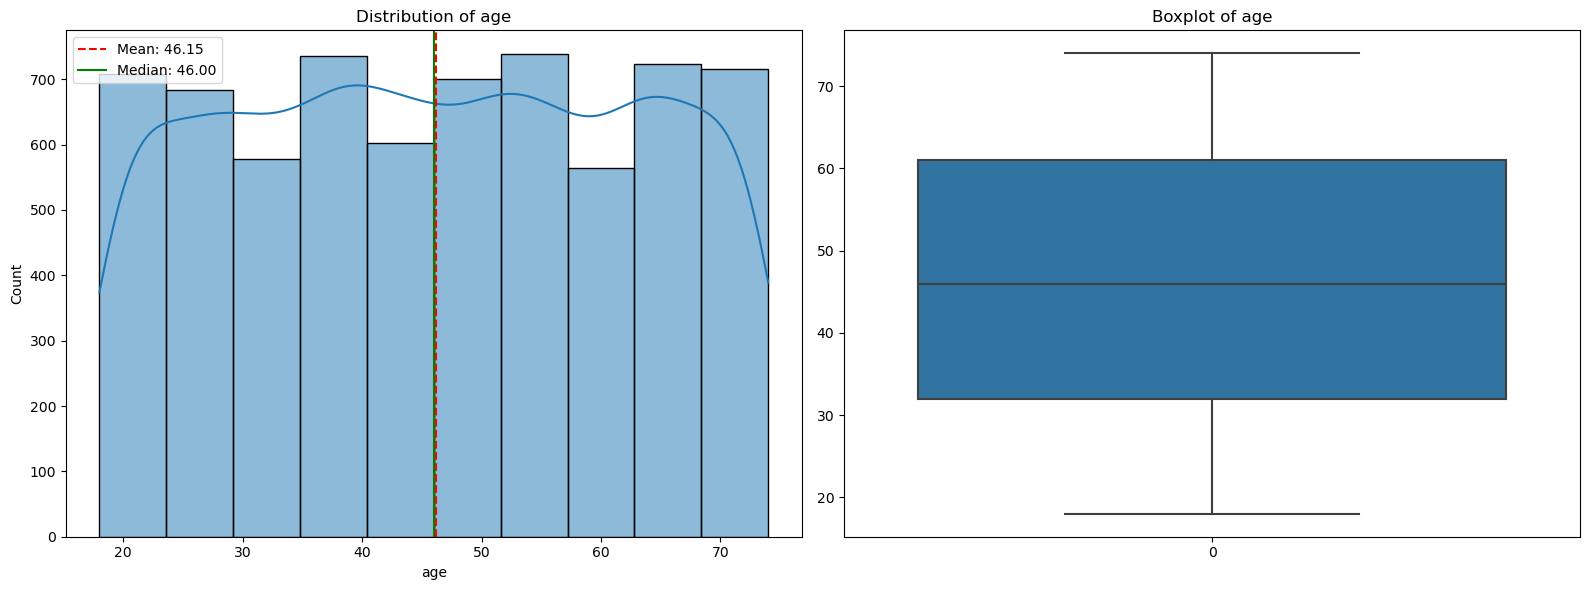

In [8]:
col = "age"
mean_value = data[col].mean()
median_value = data[col].median()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data[col], kde=True, bins=10, ax=axes[0])
axes[0].axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
axes[0].axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
axes[0].set_title(f"Distribution of {col}")
axes[0].legend()

sns.boxplot(data[col], ax=axes[1])
axes[1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

- As we can observer the **mean(45.15)** and **median(46.00)** age is approximately same. And the distribution looks like symmetric. So we can assume that age shows a uniform distribution

### Analysis of `Age` with target variable `charge_off_status`

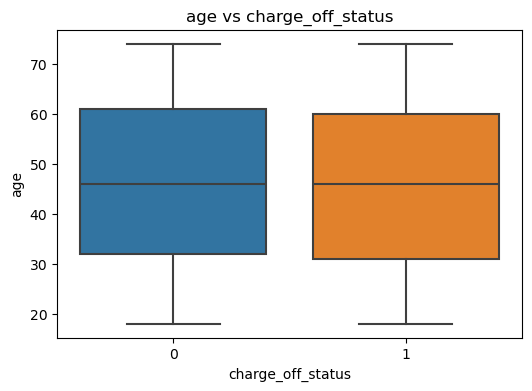

In [180]:
col = "age"
plt.figure(figsize=(6, 4))
sns.boxplot(x="charge_off_status", y=col, data=data)  
plt.title(f"{col} vs charge_off_status")
plt.show()

### 2.2 `Income_Level`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


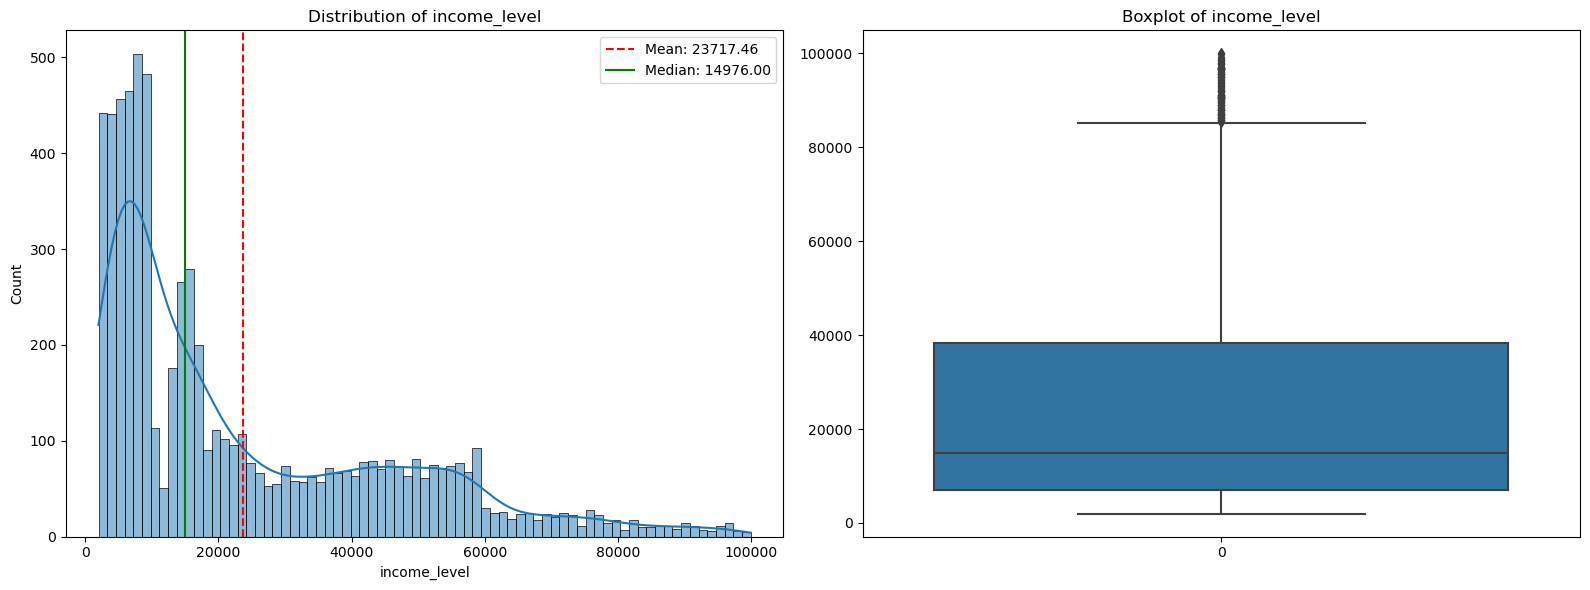

Skewness = 1.1842741957822285


In [9]:
col = "income_level"
mean_value = data[col].mean()
median_value = data[col].median()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data[col], kde=True, bins=75, ax=axes[0])
axes[0].axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
axes[0].axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
axes[0].set_title(f"Distribution of {col}")
axes[0].legend()

sns.boxplot(data[col], ax=axes[1])
axes[1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

print(f"Skewness = {skew(data[col])}")

- The distribution of the **Income level** shows a positivley skewness. With **mean = 23717.46** and **median = 14976.00**
- Ther are some outliers when observing the BoxPlot. However have to analyse on them further

### Analysis of `income_level` with other demographical factors of the customers

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


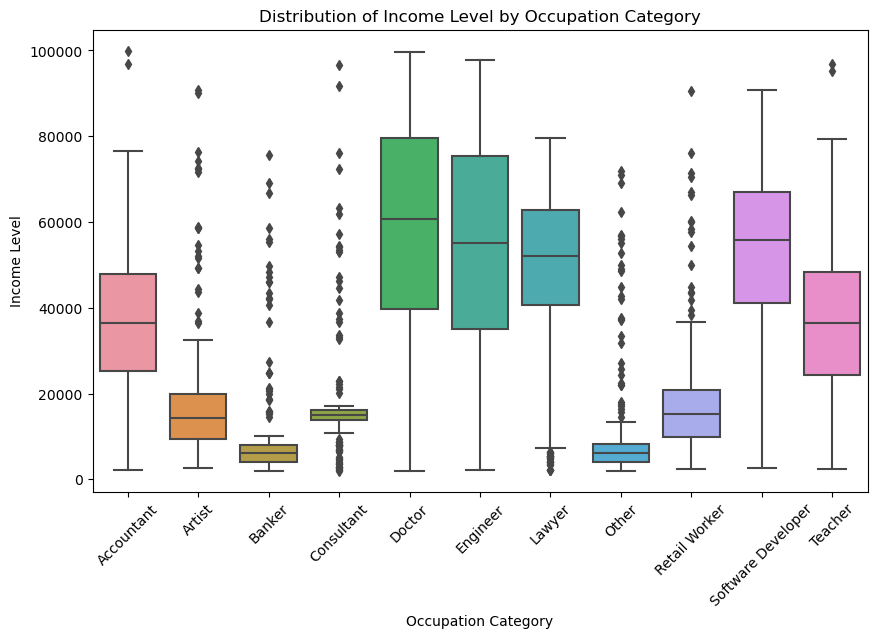

In [186]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='occupation', y='income_level', data=data)

plt.title('Distribution of Income Level by Occupation Category')
plt.xlabel('Occupation Category')
plt.ylabel('Income Level')
plt.xticks(rotation=45)
plt.show()

- We can observe that High Occupations such as Doctor,Engineer,Lawyer,Software Developer have higher income levels as than other categories and Teachers and Accountants have moderate income level

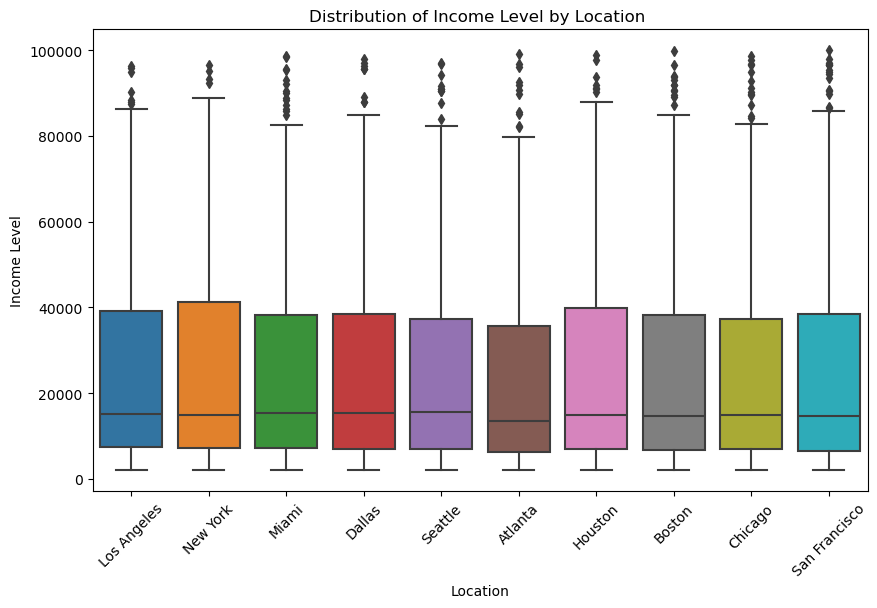

In [187]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='income_level', data=data)

plt.title('Distribution of Income Level by Location ')
plt.xlabel('Location')
plt.ylabel('Income Level')
plt.xticks(rotation=45)
plt.show()

- As all the box plots of **income level** with respect to **location** are similar, we can say that location does not affect the income level of a customer

### Analysis of `income_level` with target variable `charge_off_status`

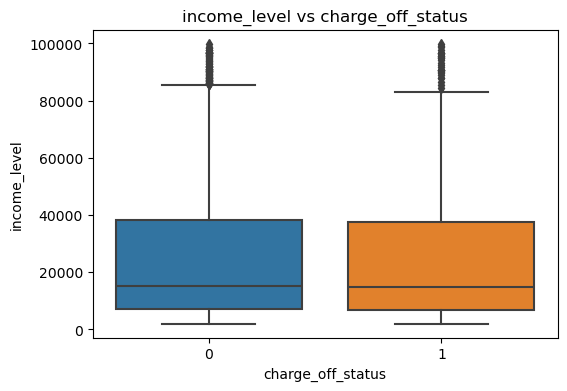

In [185]:
col = "income_level"
plt.figure(figsize=(6, 4))
sns.boxplot(x="charge_off_status", y=col, data=data)  
# sns.stripplot(x="charge_off_status", y=col, data=data, 
#               color='black', size=4, jitter=True, alpha=0.3)
plt.title(f"{col} vs charge_off_status")
plt.show()

- As the box plots of charged off and non charged off customers with repect to income level are similar, we can say that income level does not affect the charge off status directly 

### 2.3 `Fico_score`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


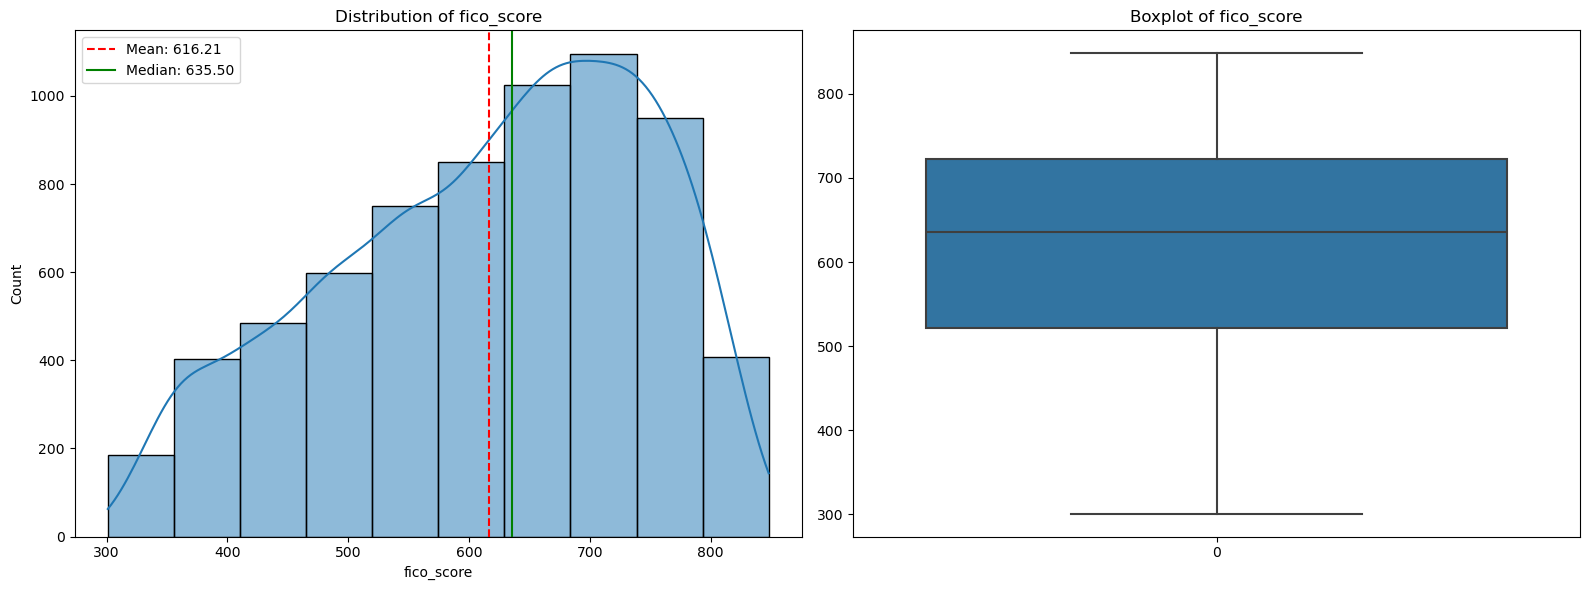

Skewness = -0.4017081930161186


In [10]:
col = "fico_score"
mean_value = data[col].mean()
median_value = data[col].median()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data[col], kde=True, bins=10, ax=axes[0])
axes[0].axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
axes[0].axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
axes[0].set_title(f"Distribution of {col}")
axes[0].legend()

sns.boxplot(data[col], ax=axes[1])
axes[1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

print(f"Skewness = {skew(data[col])}")

- The distribution of the **Fico Score** shows a slightly negetive skewness. With **mean = 616.21** and **median = 635.50**

### Analysis of `fico_score` with demographical factors of the customers

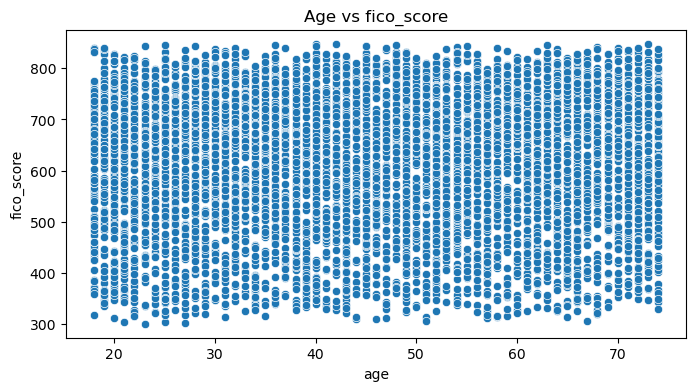

Correlation with Age: 0.02099036109191216


In [190]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=data['age'], y=data['fico_score'])
plt.title("Age vs fico_score")
plt.show()

correlation_age = data['fico_score'].corr(data['age'])
print("Correlation with Age:", correlation_age)


- We can observer there is not relationship between **fico_score** and **age**

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


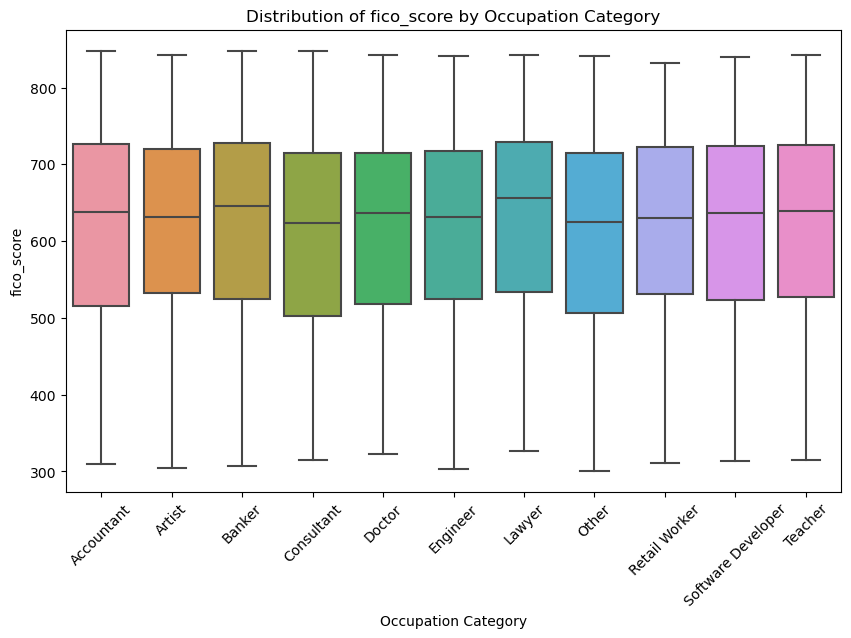

In [188]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='occupation', y='fico_score', data=data)

plt.title('Distribution of fico_score by Occupation Category')
plt.xlabel('Occupation Category')
plt.ylabel('fico_score')
plt.xticks(rotation=45)
plt.show()

- As all the box plots of **fico_score** with respect to **occupation** are similar, we can say that **occupation** does not affect the **fico_score** of a customer

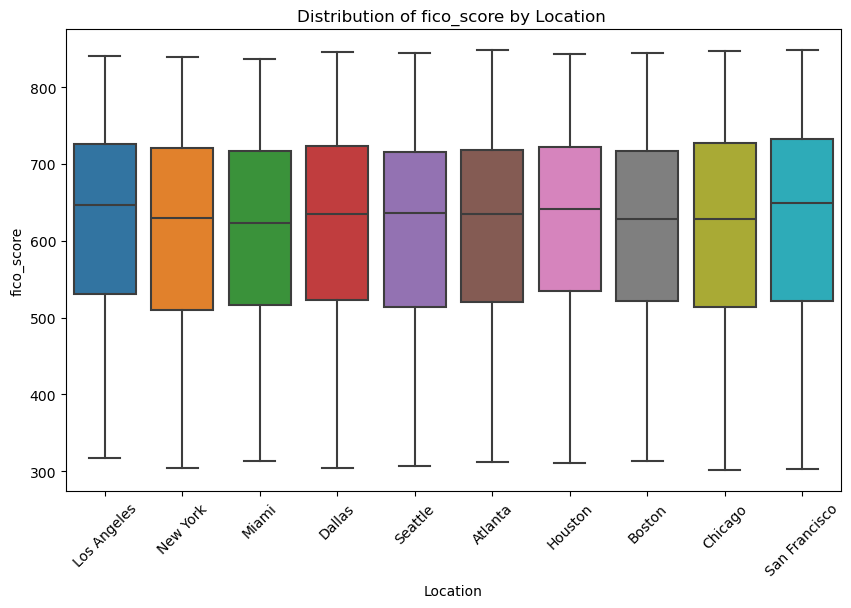

In [189]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='fico_score', data=data)

plt.title('Distribution of fico_score by Location ')
plt.xlabel('Location')
plt.ylabel('fico_score')
plt.xticks(rotation=45)
plt.show()

- As all the box plots of **fico_score** with respect to **location** are similar, we can say that **location** does not affect the **fico_score** of a customer

### Analysis of `fico_score` with target variable `charge_off_status`

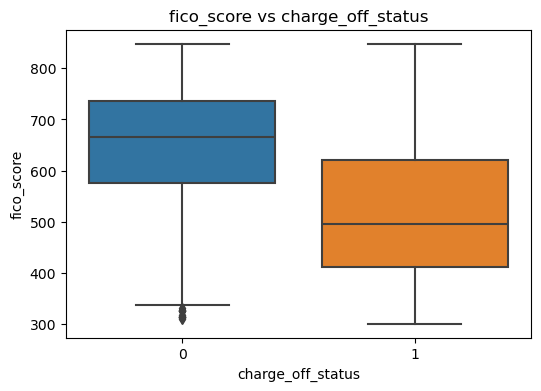

In [196]:
col = "fico_score"
plt.figure(figsize=(6, 4))
sns.boxplot(x="charge_off_status", y=col, data=data)  
plt.title(f"{col} vs charge_off_status")
plt.show()

- According to the boxplots, there is a clear difference in fico_score in charged-off and non-charged-off customers
- Non-charged off customers tend to have higher fico scores

In [197]:
group_0 = data[data["charge_off_status"] == 0][col]
group_1 = data[data["charge_off_status"] == 1][col]

shapiro_group_0 = shapiro(group_0)
shapiro_group_1 = shapiro(group_1)

print("Shapiro Test for Group 0 (charge_off_status 0):", shapiro_group_0)
print("Shapiro Test for Group 1 (charge_off_status 1):", shapiro_group_1)


Shapiro Test for Group 0 (charge_off_status 0): ShapiroResult(statistic=0.9669206738471985, pvalue=2.1946473652380354e-32)
Shapiro Test for Group 1 (charge_off_status 1): ShapiroResult(statistic=0.9523214101791382, pvalue=1.7077562221090258e-23)


- Distributions are not normal. So using "Mann-Whitney U Test"

In [198]:
u_stat, p_value = mannwhitneyu(group_0, group_1)
print(f"U-statistic: {u_stat}, p-value: {p_value}")

U-statistic: 6687972.5, p-value: 4.1170700839348146e-235


- p-value: 4.1170700839348146e-235 < 0.05
- So we can confirm that there is a significant difference in distributions of charged-off and non charged-off customers' fico scores

### 2.4 `delinquency_status`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


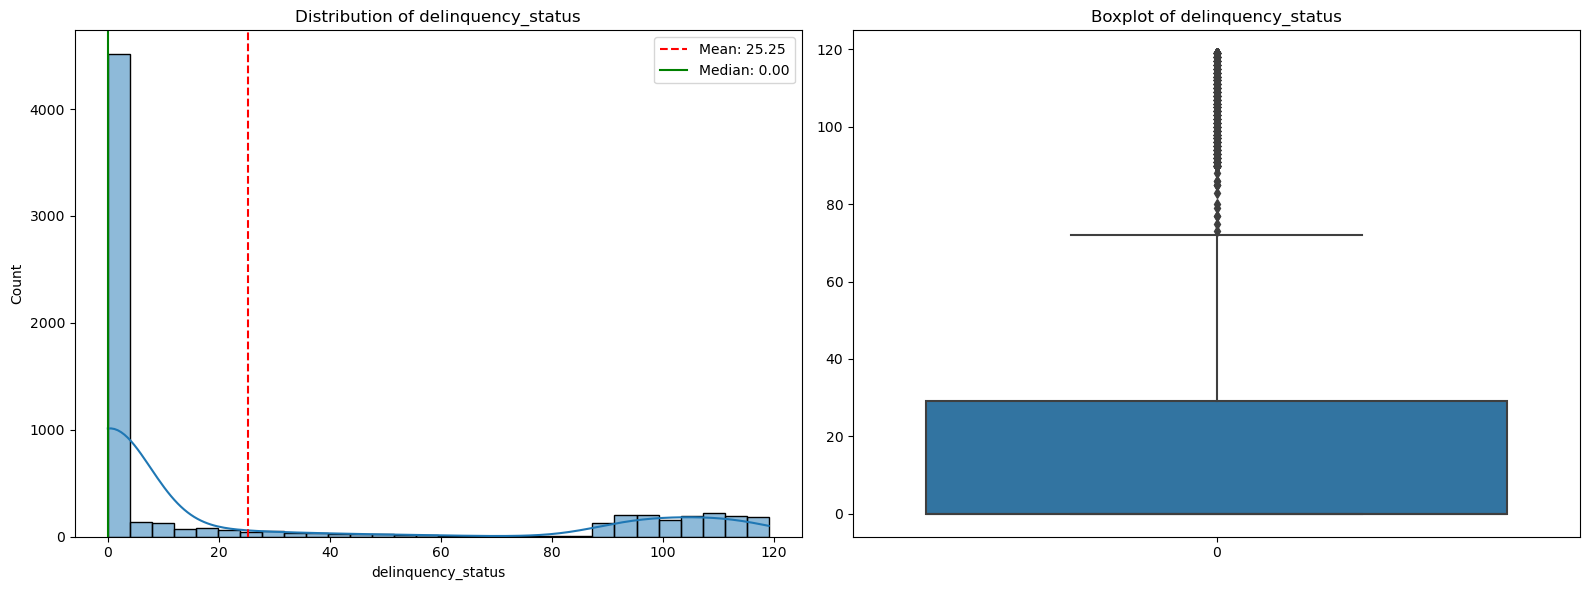

Skewness = 1.2870840525694143
3rd Quartile (Q3): 29.0


In [11]:
col = "delinquency_status"
mean_value = data[col].mean()
median_value = data[col].median()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data[col], kde=True, bins=30, ax=axes[0])
axes[0].axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
axes[0].axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
axes[0].set_title(f"Distribution of {col}")
axes[0].legend()

sns.boxplot(data[col], ax=axes[1])
axes[1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

print(f"Skewness = {skew(data[col])}")

q3 = np.percentile(data[col], 75)
print("3rd Quartile (Q3):", q3)

- A positively skewed distribution is observed. With **mean = 25.25** and **median = 0**
- As the median is 0, we can say that >50% customers have no delinquency (not late with payments)
- Q3 = 29, indicates further that mojority of customers are not highly in payments
- When observing the histogram and the boxplot, we can observe outliers which indicates highly deliquency. These might be monitored further for **high-risk customers**

In [12]:
q1 = np.percentile(data[col], 25)
q3 = np.percentile(data[col], 75)
iqr = q3 - q1

threshold = q3 + 1.5 * iqr

# Filter high-risk customers
high_delinquency_customers = data[data["delinquency_status"] > threshold]

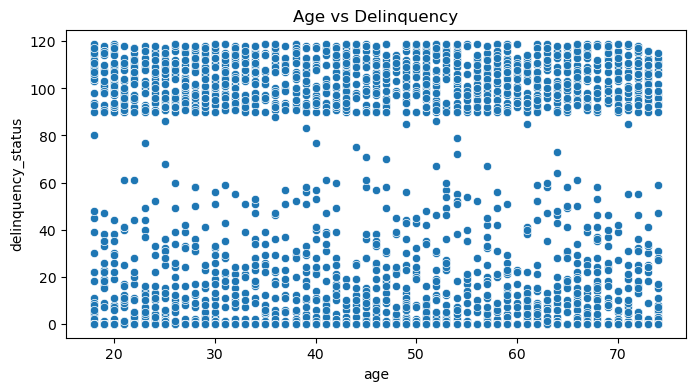

Correlation with Age: -0.012780203573551379


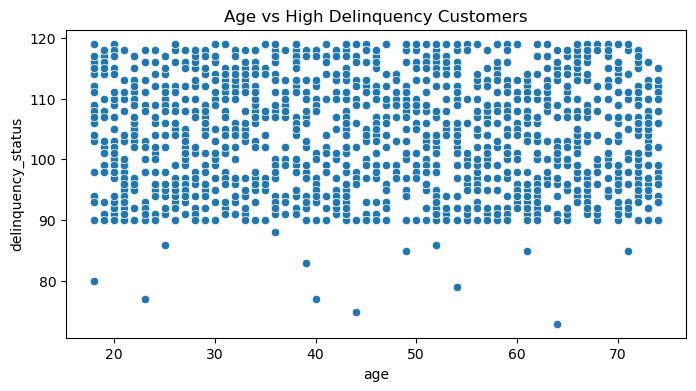

Correlation with Age: 0.035036710058804016


In [13]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=data['age'], y=data['delinquency_status'])
plt.title("Age vs Delinquency")
plt.show()

correlation_age = data['delinquency_status'].corr(data['age'])
print("Correlation with Age:", correlation_age)

plt.figure(figsize=(8, 4))
sns.scatterplot(x=high_delinquency_customers['age'], y=high_delinquency_customers['delinquency_status'])
plt.title("Age vs High Delinquency Customers")
plt.show()

correlation_age = high_delinquency_customers['delinquency_status'].corr(high_delinquency_customers['age'])
print("Correlation with Age:", correlation_age)

- We can't observe any relationship between **Age** and **Delinquency Status** or **Highly Deliquent Customers**

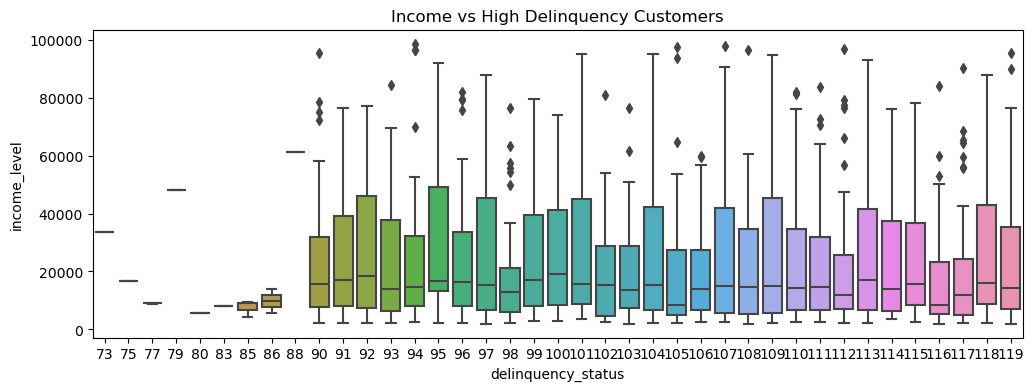

Correlation with Age: -0.016773696696926993


In [14]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=high_delinquency_customers['delinquency_status'], y=high_delinquency_customers['income_level'])
plt.title("Income vs High Delinquency Customers")
plt.show()

correlation_age = high_delinquency_customers['delinquency_status'].corr(high_delinquency_customers['income_level'])
print("Correlation with Age:", correlation_age)

- We can't observe any relationship between **income_level** and **Highly Deliquent Customers**

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


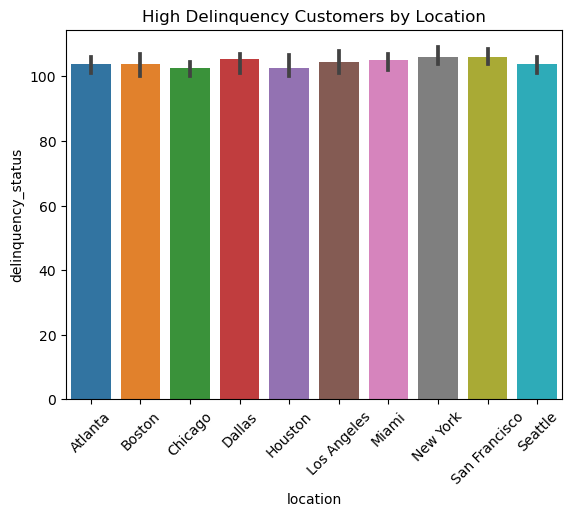

In [61]:
sns.barplot(x=high_delinquency_customers['location'], y=high_delinquency_customers['delinquency_status'], estimator=np.median)
plt.title("High Delinquency Customers by Location")
plt.xticks(rotation=45)
plt.show()

- We can't observe any relationship between **location** and **Highly Deliquent Customers**

### Analysis of `delinquency_status` with target variable `charge_off_status`

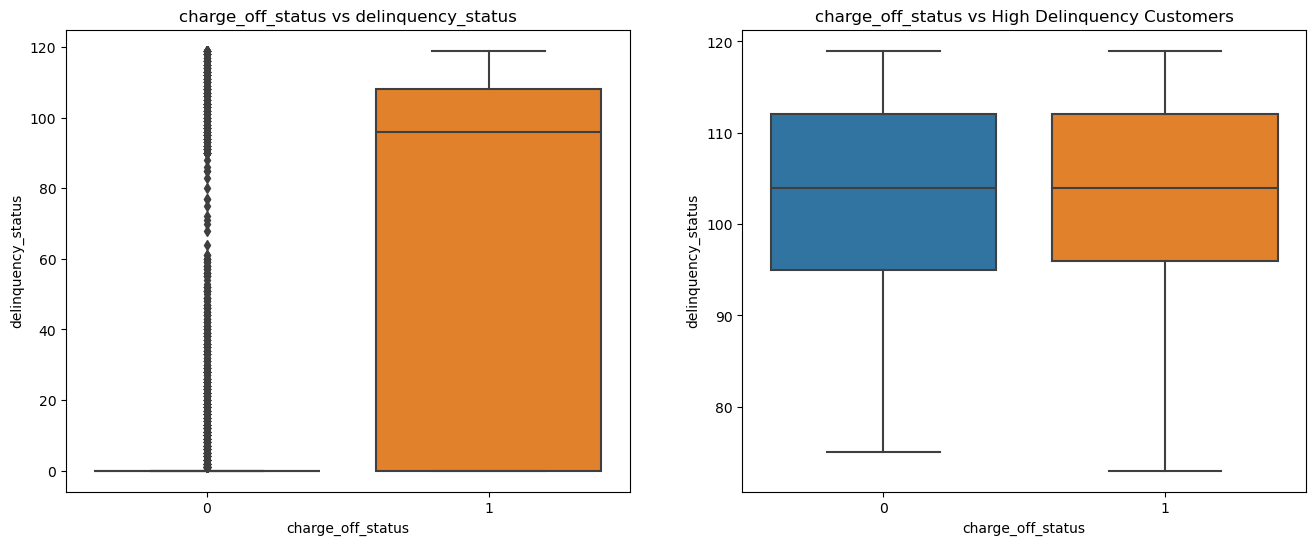

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x=data['charge_off_status'], y=data['delinquency_status'],ax=axes[0])
axes[0].set_title("charge_off_status vs delinquency_status")


sns.boxplot(x=high_delinquency_customers['charge_off_status'], y=high_delinquency_customers['delinquency_status'],ax=axes[1])
axes[1].set_title("charge_off_status vs High Delinquency Customers")
plt.show()

- By overall customers who haven't been charged off typically have low delinquency, with the median being around 0 days late and customers who have been charged off tend to have higher delinquency, with the median being around 99 days late 
- For both charged off and non-charged off customers with higher deliquency, the median delinquency is around 105 days late
- As a result we can say that, high delinquency alone doesn't clearly predict whether an account will be charged off

### 2.5 `number_of_credit_applications`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


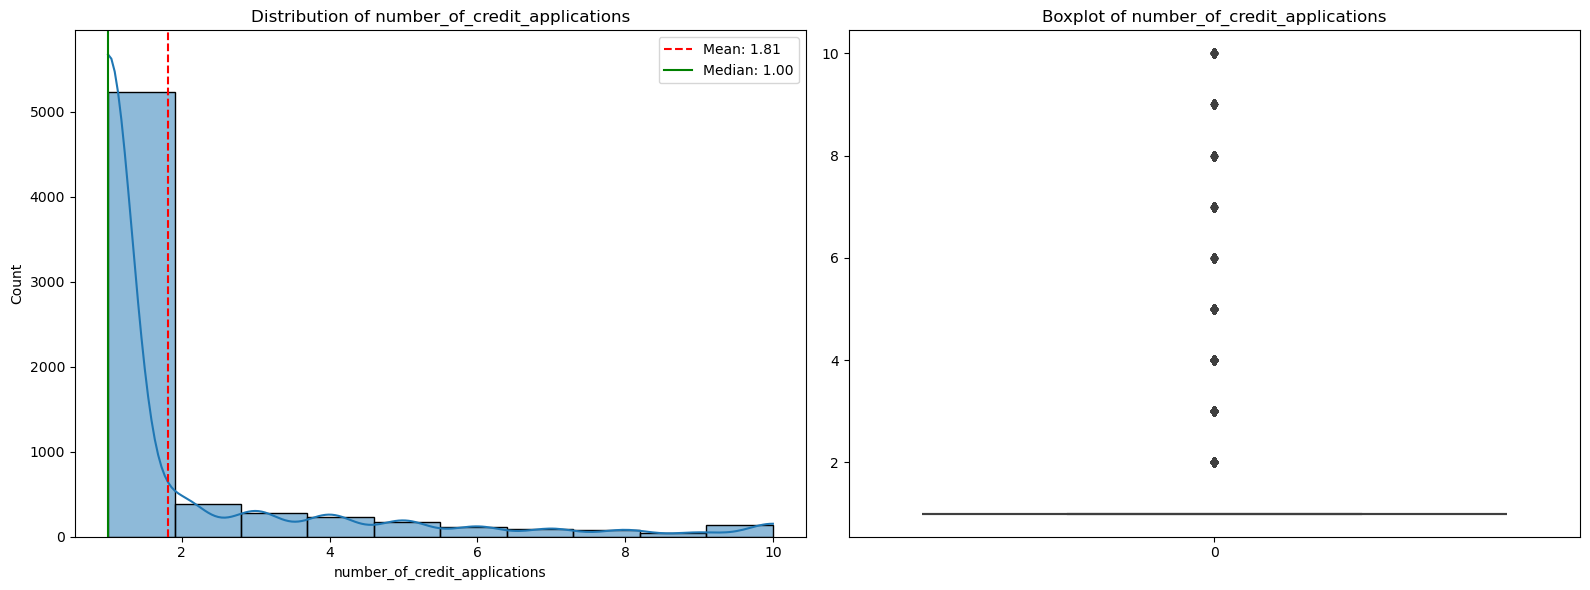

3rd Quartile (Q3): 1.0


In [17]:
col = "number_of_credit_applications"
mean_value = data[col].mean()
median_value = data[col].median()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data[col], kde=True, bins=10, ax=axes[0])
axes[0].axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
axes[0].axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
axes[0].set_title(f"Distribution of {col}")
axes[0].legend()

sns.boxplot(data[col], ax=axes[1])
axes[1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

q3 = np.percentile(data[col], 75)
print("3rd Quartile (Q3):", q3)

- The distribution of **Number of credit applications** is positively skewed with a **median = 1** and **Q3 = 1**, indicating that >75% of the customers have only applied for 1 time within a certain period of time
- Oultliers are worth for further investigation

In [18]:
q1 = np.percentile(data[col], 25)
q3 = np.percentile(data[col], 75)
iqr = q3 - q1

threshold = q3 + 1.5 * iqr

# Filter high-risk customers
high_number_of_credit_applications_customers = data[data["number_of_credit_applications"] > threshold]

### Analysis of `number_of_credit_applications` with demographical factors of the customers

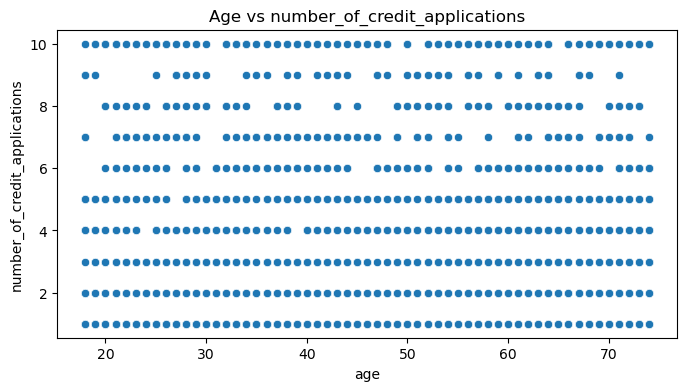

Correlation with Age: 0.0019734912153490554


In [19]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=data['age'], y=data['number_of_credit_applications'])
plt.title("Age vs number_of_credit_applications")
plt.show()

correlation_age = data['number_of_credit_applications'].corr(data['age'])
print("Correlation with Age:", correlation_age)

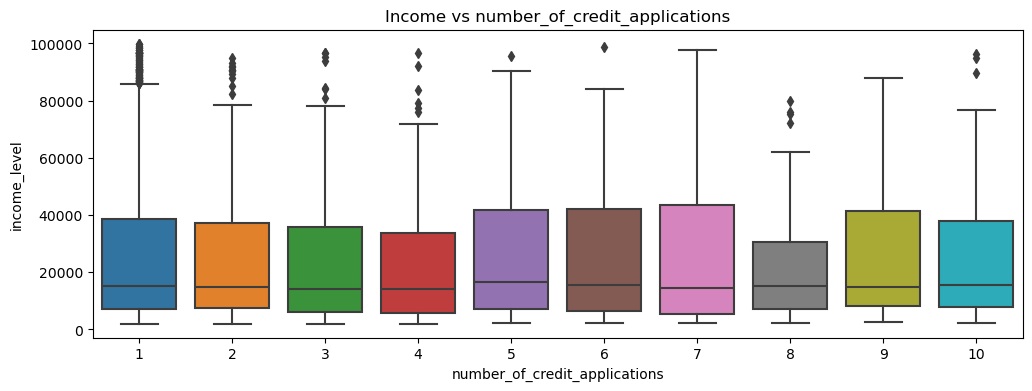

Correlation with Age: 0.0033338707542122756


In [20]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=data['number_of_credit_applications'], y=data['income_level'])
plt.title("Income vs number_of_credit_applications")
plt.show()

correlation_age = data['number_of_credit_applications'].corr(data['income_level'])
print("Correlation with Age:", correlation_age)

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


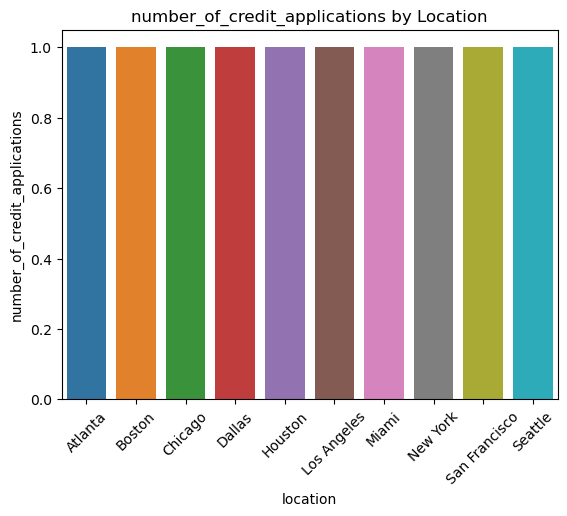

In [60]:
sns.barplot(x=data['location'], y=data['number_of_credit_applications'], estimator=np.median)
plt.title("number_of_credit_applications by Location")
plt.xticks(rotation=45)
plt.show()

- Demographical factors does not indicate any relationship with the `number_of_credit_applications`

### Analysis of `number_of_credit_applications` with target variable `charge_off_status`

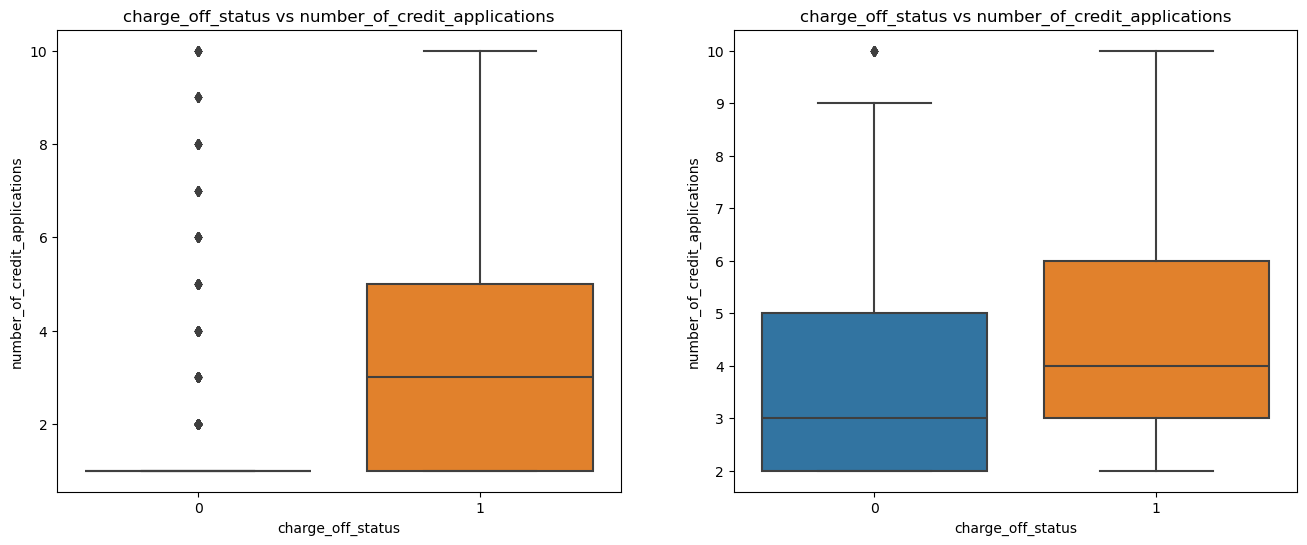

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x=data['charge_off_status'], y=data['number_of_credit_applications'],ax=axes[0])
axes[0].set_title("charge_off_status vs number_of_credit_applications")


sns.boxplot(x=high_number_of_credit_applications_customers['charge_off_status'], y=high_number_of_credit_applications_customers['number_of_credit_applications'],ax=axes[1])
axes[1].set_title("charge_off_status vs number_of_credit_applications")
plt.show()

- By overall customers who haven't been charged off typically have low number_of_credit_applications, with the median being around 1 and customers who have been charged off tend to have higher number_of_credit_applications, with the median being around 3 accounts 
- For customers with non-charged off with higher number_of_credit_applications has a positivley skewed distribution with a median of 3 number of credit applications and charged off customers with higher number_of_credit_applications, also has a positively skewed distribution with a median of 4 number of credit applications
- As we can observe that. Having high number or credit applications might lead to high credit risk

### 2.6 `Debt_to_income_ratio`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


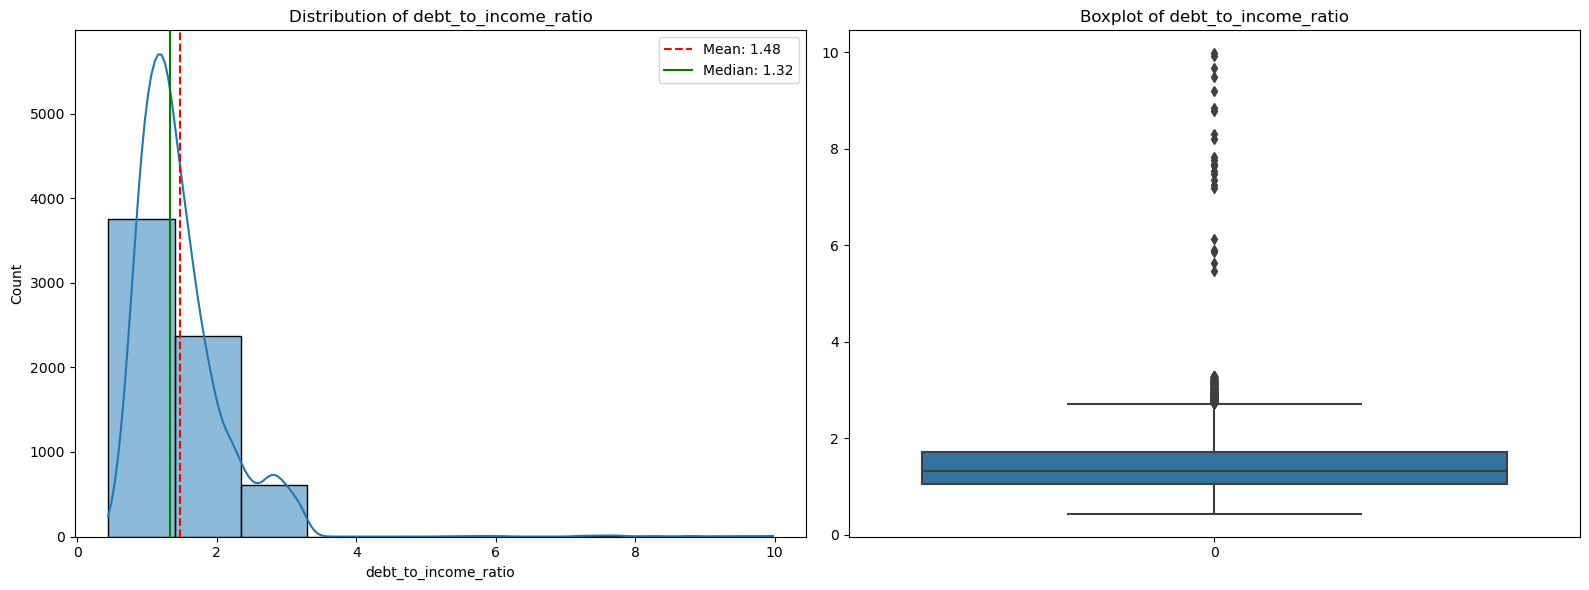

Skewness = 3.6052097822272424
3rd Quartile (Q3): 1.7197098355269027


In [35]:
col = "debt_to_income_ratio"
mean_value = data[col].mean()
median_value = data[col].median()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data[col], kde=True, bins=10, ax=axes[0])
axes[0].axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
axes[0].axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
axes[0].set_title(f"Distribution of {col}")
axes[0].legend()

sns.boxplot(data[col], ax=axes[1])
axes[1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

print(f"Skewness = {skew(data[col])}")

q3 = np.percentile(data[col], 75)
print("3rd Quartile (Q3):", q3)

In [36]:
q1 = np.percentile(data[col], 25)
q3 = np.percentile(data[col], 75)
iqr = q3 - q1

threshold = q3 + 1.5 * iqr

# Filter high-risk customers
high_debt_to_income_ratio_customers = data[data["debt_to_income_ratio"] > threshold]

- Distribution of **Debt to income ratio** is positivel skewed with a **median = 1.32**

### Analysis of `debt_to_income_ratio` with demographical factors of the customers

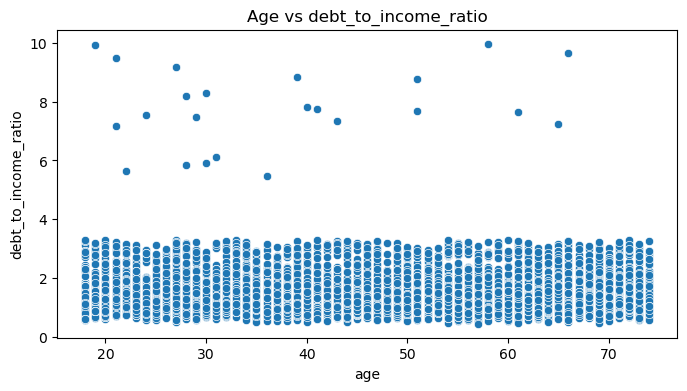

Correlation with Age: -0.0067224220736064825


In [25]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=data['age'], y=data['debt_to_income_ratio'])
plt.title("Age vs debt_to_income_ratio")
plt.show()

correlation_age = data['debt_to_income_ratio'].corr(data['age'])
print("Correlation with Age:", correlation_age)

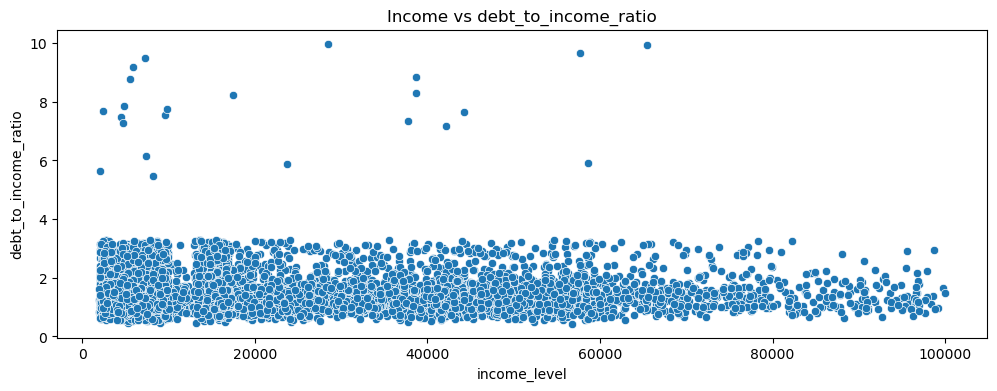

Correlation with Age: -0.00941245466447739


In [28]:
plt.figure(figsize=(12, 4))
sns.scatterplot(y=data['debt_to_income_ratio'], x=data['income_level'])
plt.title("Income vs debt_to_income_ratio")
plt.show()

correlation_age = data['debt_to_income_ratio'].corr(data['income_level'])
print("Correlation with Age:", correlation_age)

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


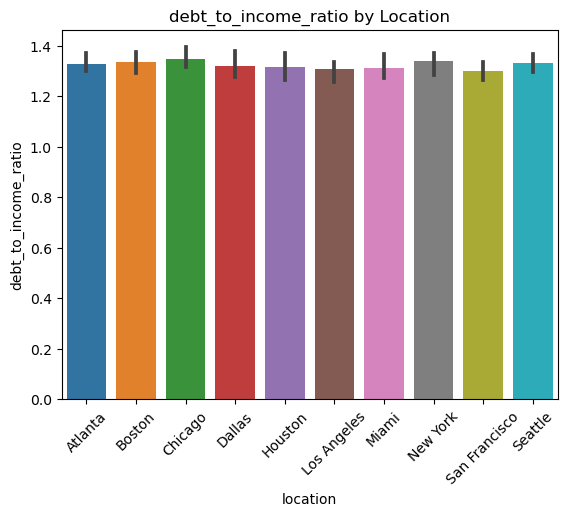

In [59]:
sns.barplot(x=data['location'], y=data['debt_to_income_ratio'], estimator=np.median)
plt.title("debt_to_income_ratio by Location")
plt.xticks(rotation=45)
plt.show()

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


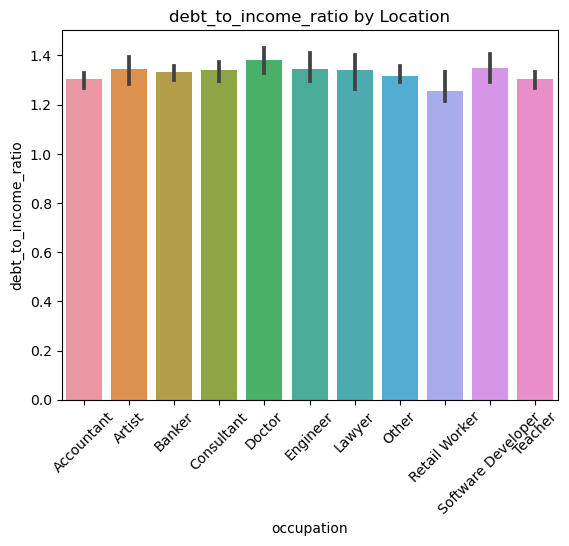

In [58]:
sns.barplot(x=data['occupation'], y=data['debt_to_income_ratio'], estimator=np.median)
plt.title("debt_to_income_ratio by Location")
plt.xticks(rotation=45)
plt.show()

- Demographical factors does not indicate any relationship with the `debt_to_income_ratio`

### Analysis of `debt_to_income_ratio` with target variable `charge_off_status`

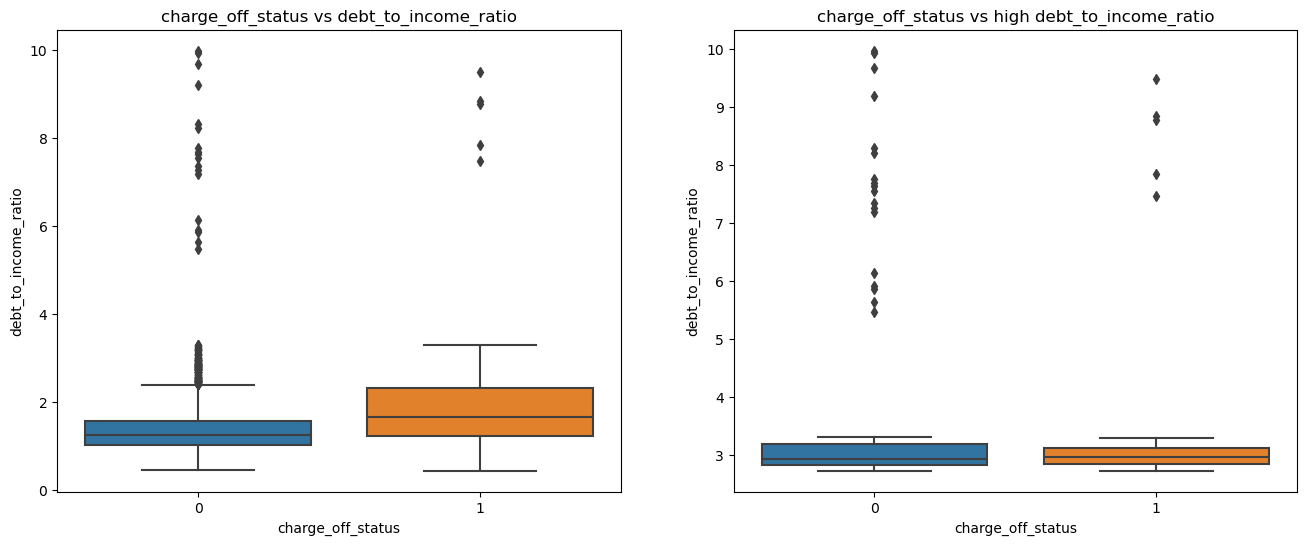

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x=data['charge_off_status'], y=data['debt_to_income_ratio'],ax=axes[0])
axes[0].set_title("charge_off_status vs debt_to_income_ratio")


sns.boxplot(x=high_debt_to_income_ratio_customers['charge_off_status'], y=high_debt_to_income_ratio_customers['debt_to_income_ratio'],ax=axes[1])
axes[1].set_title("charge_off_status vs high debt_to_income_ratio")
plt.show()

- Overal Higher debt-to-income ratios are associated with charge-offs, making this a useful risk indicator
- Among customers with high debt-to-income ratios, the charge-off and non-charge-off groups have similar median DTIs, indicating that once DTI is very high (around 3), both groups experience significant financial strain

### 2.7 `Max_balance`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


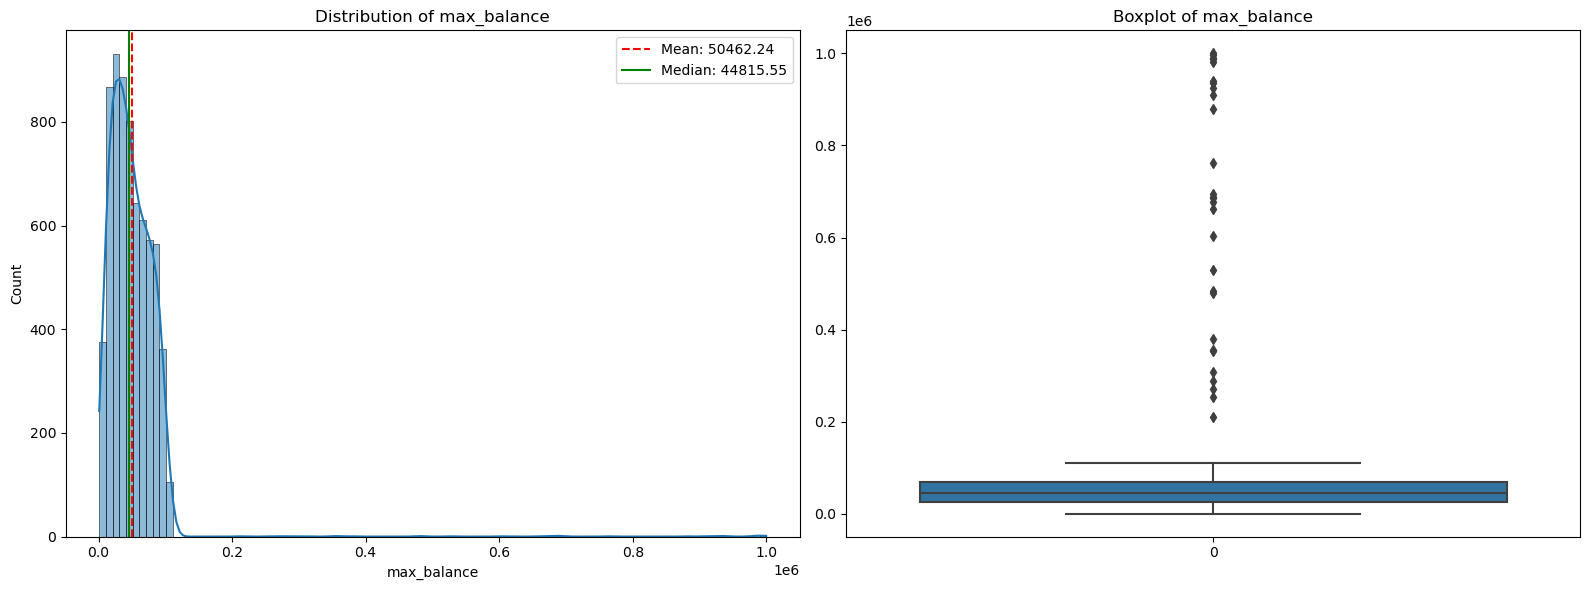

Skewness = 11.312175649577041
3rd Quartile (Q3): 70145.7427513831


In [41]:
col = "max_balance"
mean_value = data[col].mean()
median_value = data[col].median()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data[col], kde=True, bins=100, ax=axes[0])
axes[0].axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
axes[0].axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
axes[0].set_title(f"Distribution of {col}")
axes[0].legend()

sns.boxplot(data[col], ax=axes[1])
axes[1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

print(f"Skewness = {skew(data[col])}")

q3 = np.percentile(data[col], 75)
print("3rd Quartile (Q3):", q3)

- The distribution is extremely positively skewed, indicating that most customers have relatively low maximum balances. The extreme positive skewness (11.31) suggests a small group of customers have exceptionally high maximum balances
- Half of the customers have a maximum balance of 44,815.55 or less, showing that most customers do not have exceptionally high balances
- Customers with extremely high maximum balances are worth investigating further

In [49]:
q1 = np.percentile(data[col], 25)
q3 = np.percentile(data[col], 75)
iqr = q3 - q1

threshold = q3 + 1.5 * iqr

# Filter high-risk customers
high_max_balance_customers = data[data["max_balance"] > threshold]

### Analysis of `max_balance` with demographical factors of the customers

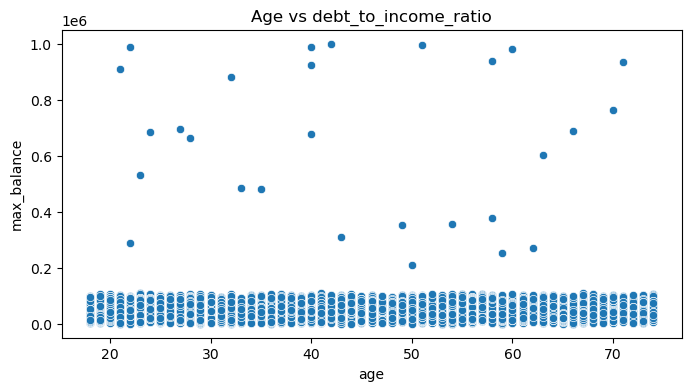

Correlation with Age: -0.006226295371002774


In [47]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=data['age'], y=data['max_balance'])
plt.title("Age vs debt_to_income_ratio")
plt.show()

correlation_age = data['max_balance'].corr(data['age'])
print("Correlation with Age:", correlation_age)

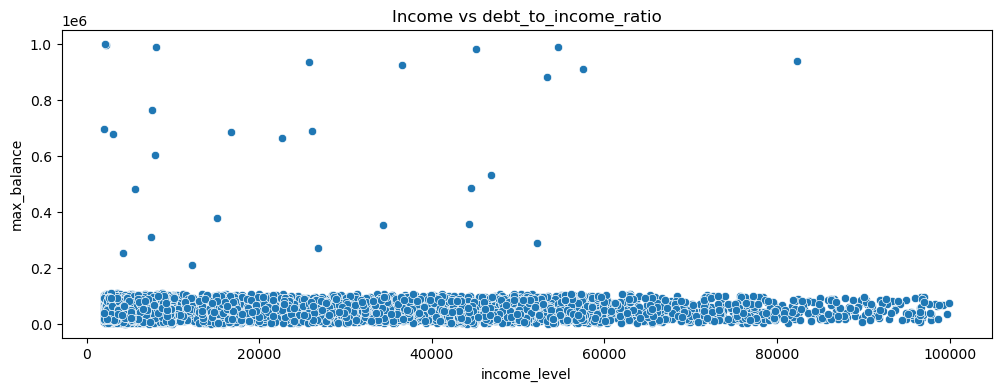

Correlation with Income level: 0.008610817891052487


In [52]:
plt.figure(figsize=(12, 4))
sns.scatterplot(y=data['max_balance'], x=data['income_level'])
plt.title("Income vs debt_to_income_ratio")
plt.show()

correlation_income_level = data['max_balance'].corr(data['income_level'])
print("Correlation with Income level:", correlation_income_level)

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


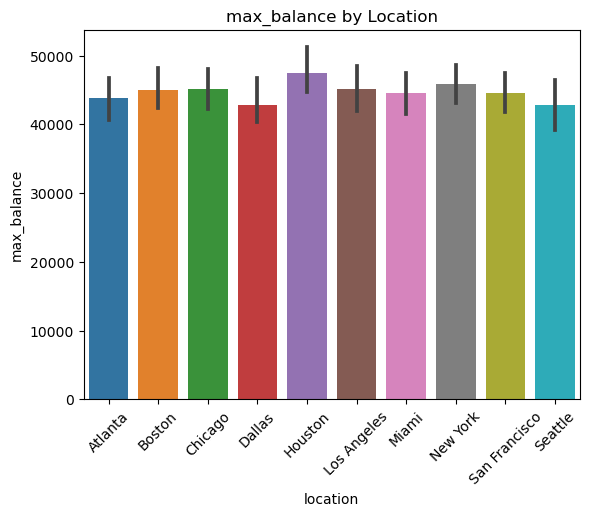

In [57]:
sns.barplot(x=data['location'], y=data['max_balance'], estimator=np.median)
plt.title("max_balance by Location")
plt.xticks(rotation=45)
plt.show()

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


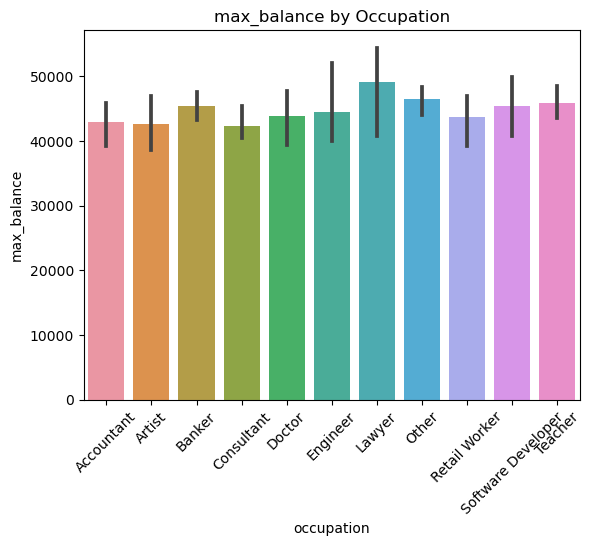

In [56]:
sns.barplot(x=data['occupation'], y=data['max_balance'], estimator=np.median)
plt.title("max_balance by Occupation")
plt.xticks(rotation=45)
plt.show()

- Demographical factors does not indicate any relationship with the `debt_to_income_ratio`

### Analysis of `max_balance` with target variable `charge_off_status`

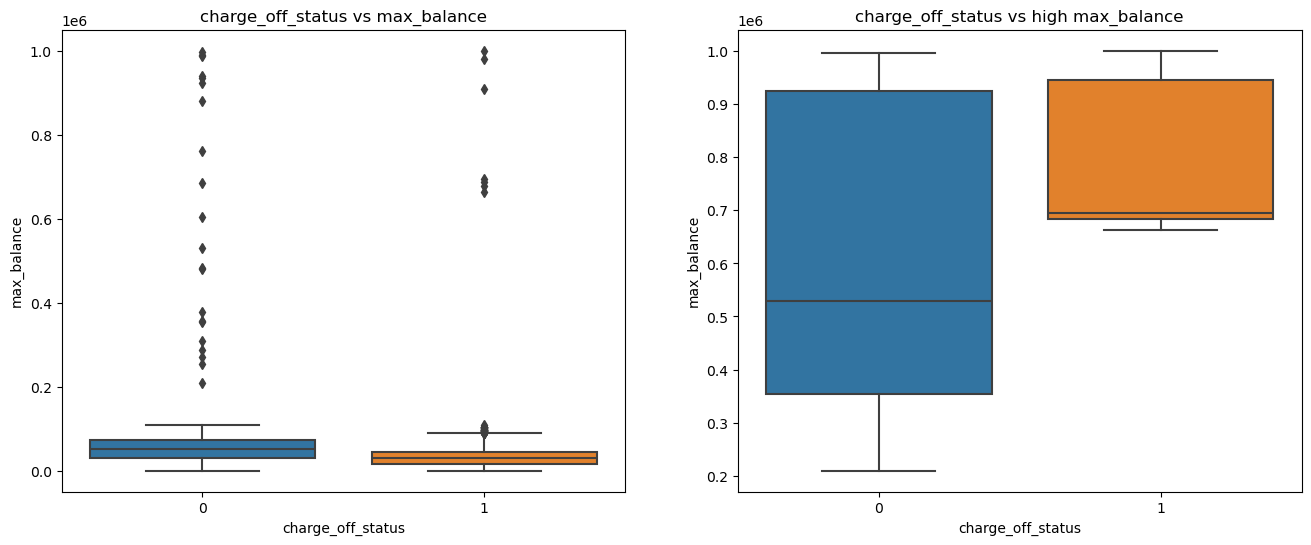

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x=data['charge_off_status'], y=data['max_balance'],ax=axes[0])
axes[0].set_title("charge_off_status vs max_balance")


sns.boxplot(x=high_max_balance_customers['charge_off_status'], y=high_max_balance_customers['max_balance'],ax=axes[1])
axes[1].set_title("charge_off_status vs high max_balance")
plt.show()

- Overall **max balance** alone does not differentiate between charge-off and non-charge-off customers
- Among **high max balance** customers, charged off customers tend to have higher medians and are clustered at higher balance ranges

### 2.8 `Avg_balance_last_12months`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


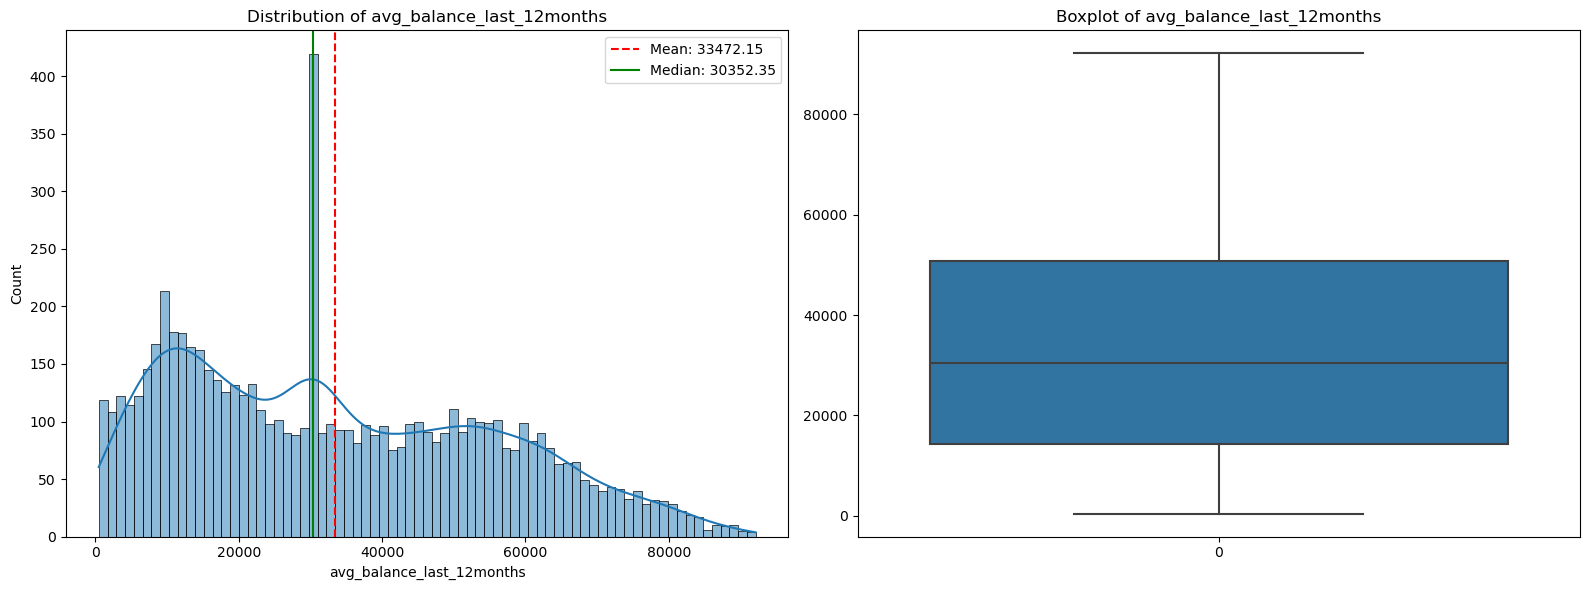

Skewness = 0.43792584795173434
3rd Quartile (Q3): 50725.2776513305


In [63]:
col = "avg_balance_last_12months"
mean_value = data[col].mean()
median_value = data[col].median()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data[col], kde=True, bins=75, ax=axes[0])
axes[0].axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
axes[0].axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
axes[0].set_title(f"Distribution of {col}")
axes[0].legend()

sns.boxplot(data[col], ax=axes[1])
axes[1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

print(f"Skewness = {skew(data[col])}")

q3 = np.percentile(data[col], 75)
print("3rd Quartile (Q3):", q3)

- The distribution is slightly positively skewed
- Does not show any outliers or unusual avg_balance_last_12months

### Analysis of `avg_balance_last_12months` with demographical factors of the customers

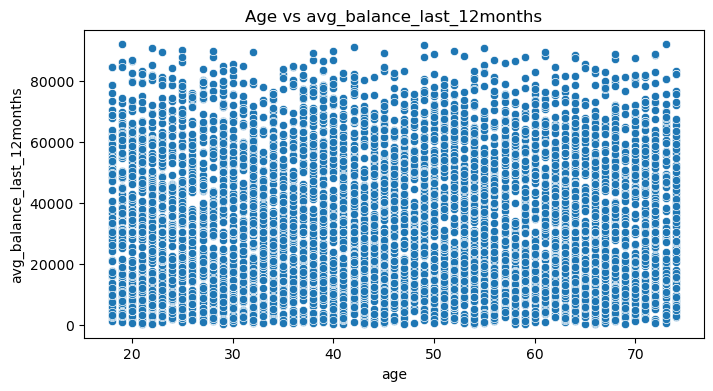

Correlation with Age: 0.002312904191791775


In [64]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=data['age'], y=data['avg_balance_last_12months'])
plt.title("Age vs avg_balance_last_12months")
plt.show()

correlation_age = data['avg_balance_last_12months'].corr(data['age'])
print("Correlation with Age:", correlation_age)

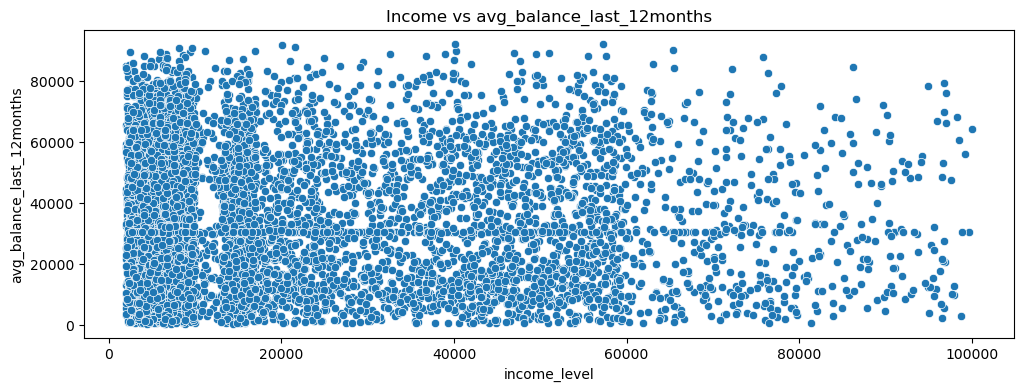

Correlation with Income level: -0.006284039896066967


In [65]:
plt.figure(figsize=(12, 4))
sns.scatterplot(y=data['avg_balance_last_12months'], x=data['income_level'])
plt.title("Income vs avg_balance_last_12months")
plt.show()

correlation_income_level = data['avg_balance_last_12months'].corr(data['income_level'])
print("Correlation with Income level:", correlation_income_level)

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


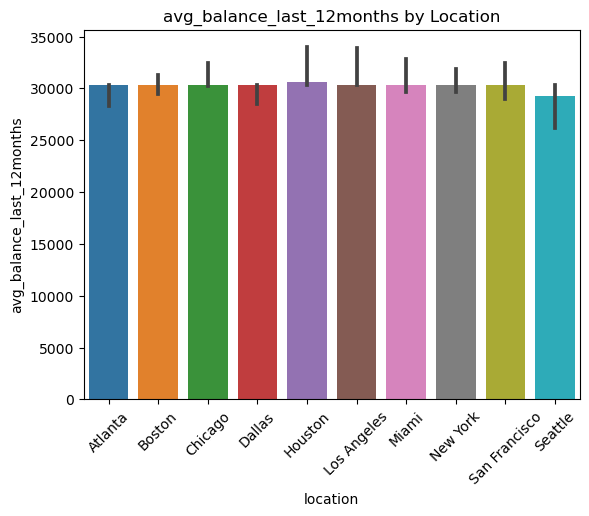

In [66]:
sns.barplot(x=data['location'], y=data['avg_balance_last_12months'], estimator=np.median)
plt.title("avg_balance_last_12months by Location")
plt.xticks(rotation=45)
plt.show()

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


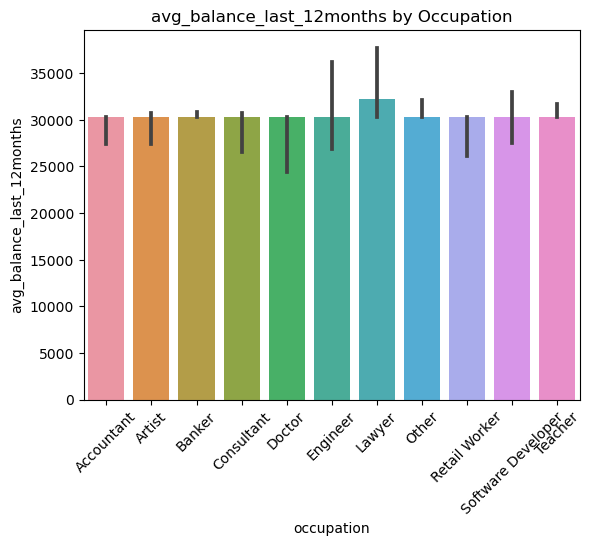

In [69]:
sns.barplot(x=data['occupation'], y=data['avg_balance_last_12months'], estimator=np.median)
plt.title("avg_balance_last_12months by Occupation")
plt.xticks(rotation=45)
plt.show()

- Demographical factors does not indicate any relationship with the `avg_balance_last_12months`

### Analysis of `avg_balance_last_12months` with target variable `charge_off_status`

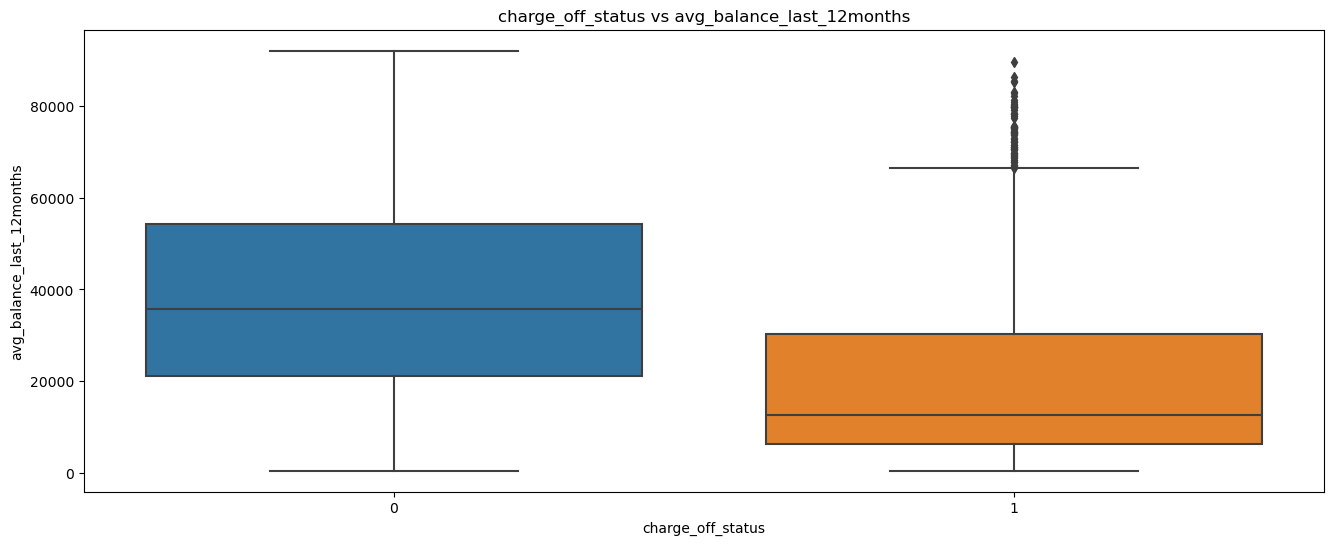

In [74]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=data['charge_off_status'], y=data['avg_balance_last_12months'])
plt.title("charge_off_status vs avg_balance_last_12months")
plt.show()

- The median average balance for non-charged-off customers is approximately more than 3x higher than for charged-off customers, This indicates that customers with lower average balances are more likely to default
- Charged-off customers tend to have significantly lower average balances 
- Some unsual average balances in charged-off customers can be observed. These customers should be analysied further

In [131]:
data["charge_off_status_str"] = data["charge_off_status"].astype(str)
data["location_str"] = data["location"].astype(str)
data["occupation_str"] = data["occupation"].astype(str)
data["number_of_delinquent_accounts"] = data["number_of_delinquent_accounts"].replace(-0.0, 0.0)
data["number_of_delinquent_accounts_str"] = data["number_of_delinquent_accounts"].astype(str)
data["number_of_defaulted_accounts_str"] = data["number_of_defaulted_accounts"].astype(str)
data["new_accounts_opened_last_12months_str"] = data["new_accounts_opened_last_12months"].astype(str)

### 2.9 `Number_of_delinquent_accounts`

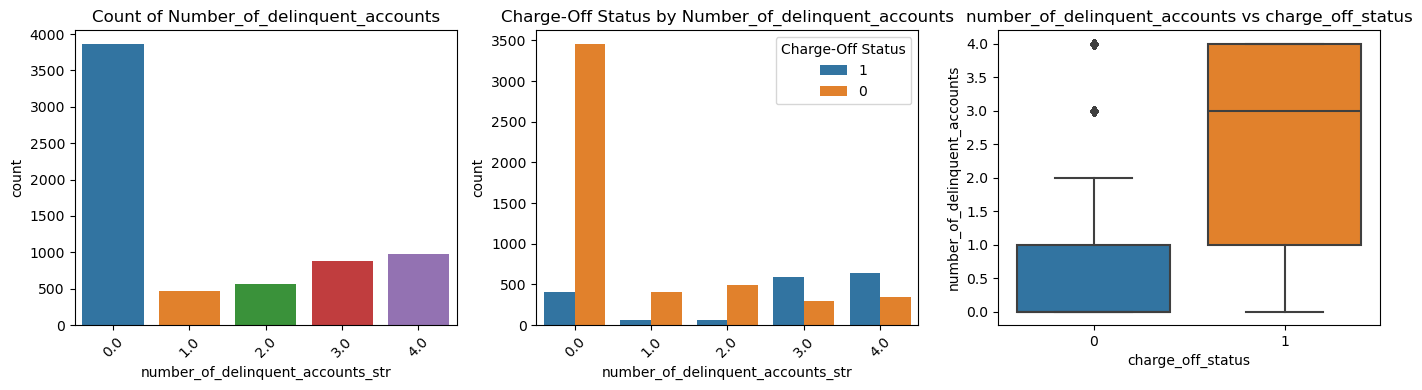

In [205]:
order = ['0.0', '1.0', '2.0', '3.0', '4.0']
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

sns.countplot(x="number_of_delinquent_accounts_str", data=data, ax=axes[0], order=order)
axes[0].set_title("Count of Number_of_delinquent_accounts")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.countplot(x="number_of_delinquent_accounts_str", hue="charge_off_status_str", data=data, ax=axes[1], order=order)
axes[1].set_title("Charge-Off Status by Number_of_delinquent_accounts")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].legend(title="Charge-Off Status")

sns.boxplot(x="charge_off_status", y="number_of_delinquent_accounts", data=data,ax=axes[2])  
axes[2].set_title(f"number_of_delinquent_accounts vs charge_off_status")

plt.tight_layout()
plt.show()

In [135]:
contingency_table = pd.crosstab(data['number_of_delinquent_accounts_str'], data['charge_off_status_str'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-square Statistic: 2122.878794319134
P-value: 0.0
Degrees of Freedom: 4
Expected Frequencies:
 [[2852.3358032  1005.6641968 ]
 [ 343.04919976  120.95080024]
 [ 414.76422644  146.23577356]
 [ 655.04653231  230.95346769]
 [ 723.80423829  255.19576171]]


In [140]:
correlation = data[["number_of_delinquent_accounts","charge_off_status"]].corr()
print(f"{correlation}")

                               number_of_delinquent_accounts  \
number_of_delinquent_accounts                       1.000000   
charge_off_status                                   0.516267   

                               charge_off_status  
number_of_delinquent_accounts           0.516267  
charge_off_status                       1.000000  


- As we can observe "Charge-Off Status by Number_of_delinquent_accounts" grapgh we can see that when the **number_of_delinquent_accounts** is less than 3, there is a high tendancy to customers to be not charged off and vise versa
- By the box plot we can observe that there is a clear difference in the distributions
- Further by the correaltion value (0.51627) and p-value of Chi Square test also we can observe that there is a moderate linera relationship from **number_of_delinquent_accounts** to **charge_off_status** and has a significat effect

### 2.10 `Number_of_defaulted_accounts`

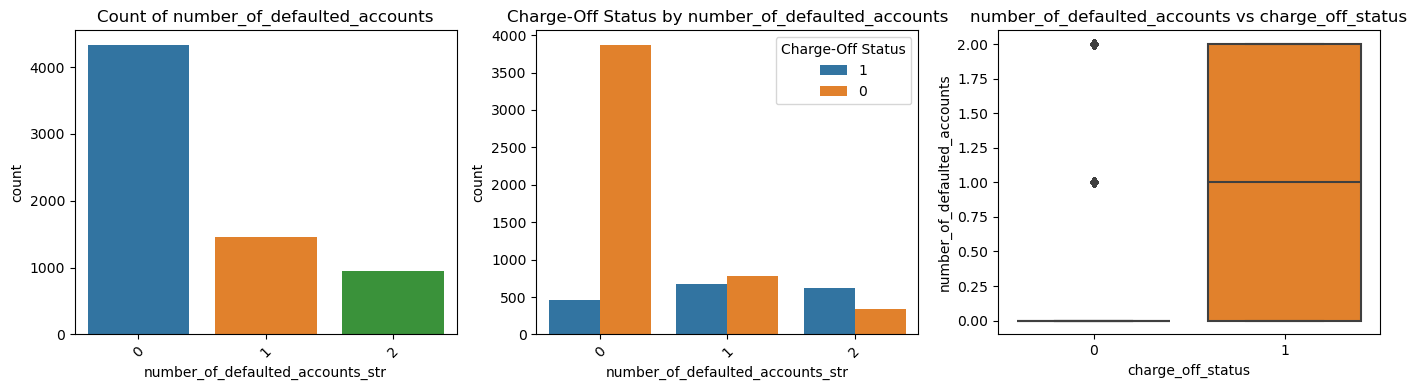

In [209]:
order = ['0','1','2']
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

sns.countplot(x="number_of_defaulted_accounts_str", data=data, ax=axes[0],order=order)
axes[0].set_title("Count of number_of_defaulted_accounts")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.countplot(x="number_of_defaulted_accounts_str", hue="charge_off_status_str", data=data, ax=axes[1],order=order)
axes[1].set_title("Charge-Off Status by number_of_defaulted_accounts")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].legend(title="Charge-Off Status")

sns.boxplot(x="charge_off_status", y="number_of_defaulted_accounts", data=data,ax=axes[2])  
axes[2].set_title(f"number_of_defaulted_accounts vs charge_off_status")

plt.tight_layout()
plt.show()

In [141]:
contingency_table = pd.crosstab(data['number_of_defaulted_accounts_str'], data['charge_off_status_str'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-square Statistic: 1587.1722066112225
P-value: 0.0
Degrees of Freedom: 2
Expected Frequencies:
 [[3203.51763485 1129.48236515]
 [1078.68272081  380.31727919]
 [ 706.79964434  249.20035566]]


In [142]:
correlation = data[["number_of_defaulted_accounts","charge_off_status"]].corr()
print(f"{correlation}")

                              number_of_defaulted_accounts  charge_off_status
number_of_defaulted_accounts                      1.000000           0.478537
charge_off_status                                 0.478537           1.000000


- As we can observe "Charge-Off Status by number_of_defaulted_accounts" graph we can see that when the **number_of_defaulted_accounts** is less than 2, majority of customers are not charged off 
- By the box plot we can observe that, When its non-charged off it is most likely to be 0 number of defaulted accounts. Howver when it is charged off, the number defaults can be either 0,1 or 
- Further by the correaltion value (0.478537) and p-value of Chi Square test also we can observe that there is a moderate linera relationship from **number_of_delinquent_accounts** to **charge_off_status** and has a significat effect

### 2.11 `New_accounts_opened_last_12months`

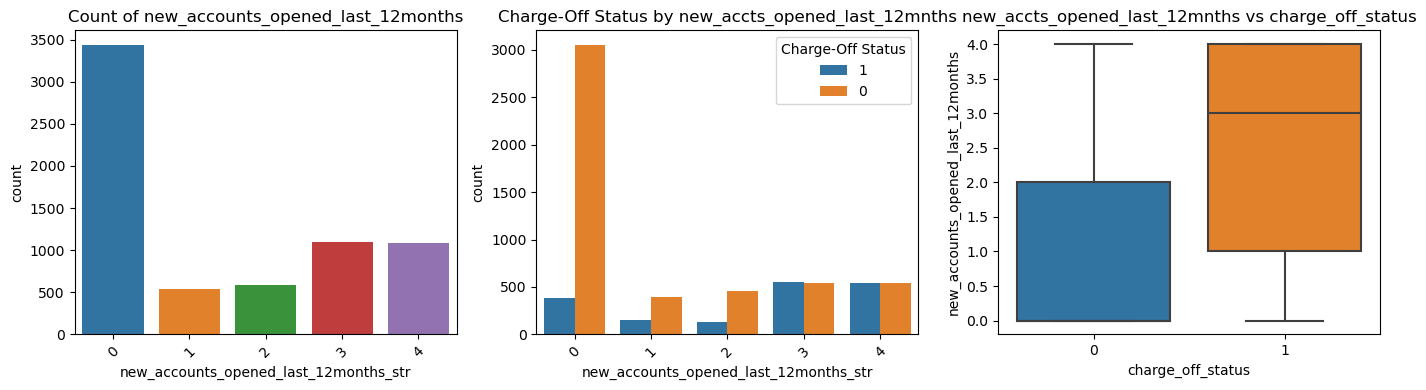

In [214]:
order = ['0', '1', '2', '3', '4']
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

sns.countplot(x="new_accounts_opened_last_12months_str", data=data, ax=axes[0],order=order)
axes[0].set_title("Count of new_accounts_opened_last_12months")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.countplot(x="new_accounts_opened_last_12months_str", hue="charge_off_status_str", data=data, ax=axes[1],order=order)
axes[1].set_title("Charge-Off Status by new_accts_opened_last_12mnths")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].legend(title="Charge-Off Status")

sns.boxplot(x="charge_off_status", y="new_accounts_opened_last_12months", data=data,ax=axes[2])  
axes[2].set_title(f"new_accts_opened_last_12mnths vs charge_off_status")

plt.tight_layout()
plt.show()

In [143]:
contingency_table = pd.crosstab(data['new_accounts_opened_last_12months_str'], data['charge_off_status_str'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-square Statistic: 1049.4601509702147
P-value: 6.813755578401204e-226
Degrees of Freedom: 4
Expected Frequencies:
 [[2541.817131    896.182869  ]
 [ 402.19561352  141.80438648]
 [ 435.46547125  153.53452875]
 [ 808.08787789  284.91212211]
 [ 801.43390634  282.56609366]]


In [144]:
correlation = data[["new_accounts_opened_last_12months","charge_off_status"]].corr()
print(f"{correlation}")

                                   new_accounts_opened_last_12months  \
new_accounts_opened_last_12months                           1.000000   
charge_off_status                                           0.379135   

                                   charge_off_status  
new_accounts_opened_last_12months           0.379135  
charge_off_status                           1.000000  


- As we can observe "Charge-Off Status by new_accounts_opened_last_12months" graph we can see that when the **new_accounts_opened_last_12months** is less than 3, majority of customers are not charged off and when it 3 is 4 no of charged-off and charged of customers are approximately same
- The chi square test p-value indicates that there is no significant effect from **new_accounts_opened_last_12months** to **charge_off_status**
- Further correlation between these two are also slightly low (0.379135) indicating a low linear relationship

### 2.12 `Location`

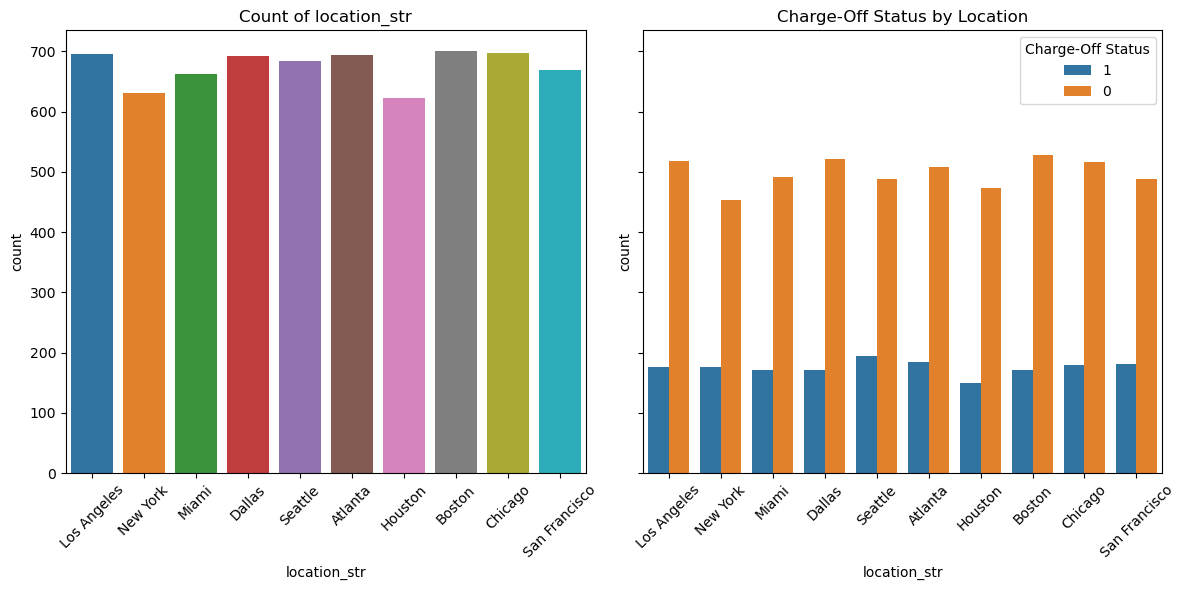

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.countplot(x="location_str", data=data, ax=axes[0])
axes[0].set_title("Count of location_str")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.countplot(x="location_str", hue="charge_off_status_str", data=data, ax=axes[1])
axes[1].set_title("Charge-Off Status by Location")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].legend(title="Charge-Off Status")

plt.tight_layout()
plt.show()


In [97]:
contingency_table = pd.crosstab(data['location_str'], data['charge_off_status_str'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-square Statistic: 6.91066849801042
P-value: 0.6464196938099749
Degrees of Freedom: 9
Expected Frequencies:
 [[513.0951393  180.9048607 ]
 [517.53112033 182.46887967]
 [515.31312982 181.68687018]
 [511.61647896 180.38352104]
 [459.86336692 162.13663308]
 [513.83446947 181.16553053]
 [490.17590397 172.82409603]
 [466.51733847 164.48266153]
 [495.35121517 174.64878483]
 [505.70183758 178.29816242]]


- As we can observe there is no significant effect from **location** to **charge off status**. This can be confirmed by the results from the Chi Squre test as well

### 2.13 `Occupation`

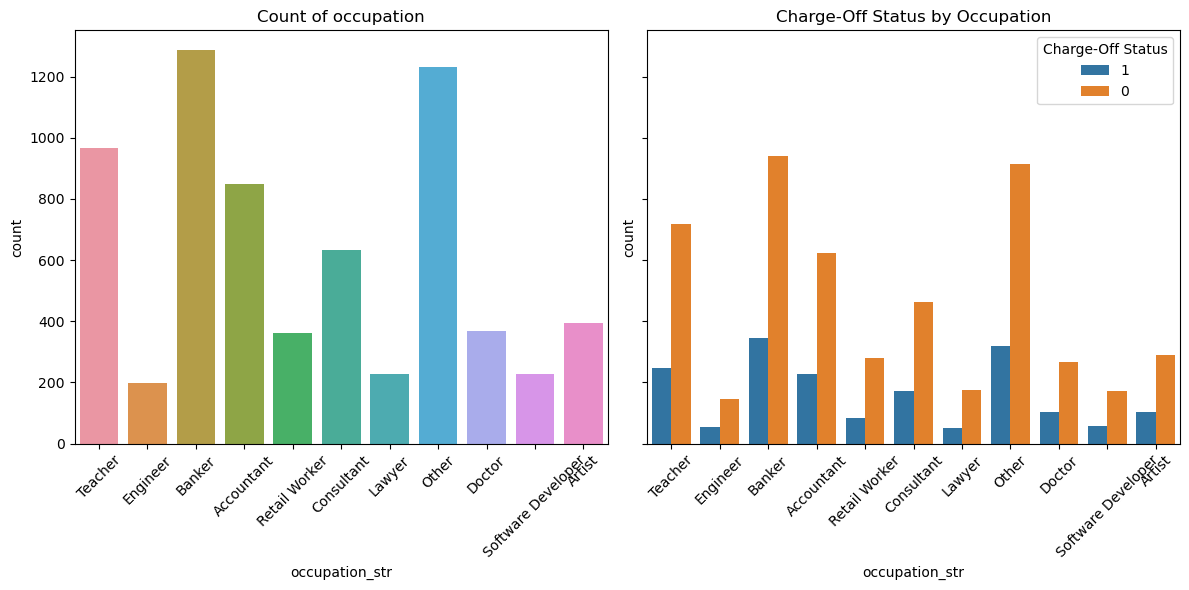

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.countplot(x="occupation_str", data=data, ax=axes[0])
axes[0].set_title("Count of occupation")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.countplot(x="occupation_str", hue="charge_off_status_str", data=data, ax=axes[1])
axes[1].set_title("Charge-Off Status by Occupation")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].legend(title="Charge-Off Status")

plt.tight_layout()
plt.show()

In [103]:
contingency_table = pd.crosstab(data['occupation_str'], data['charge_off_status_str'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-square Statistic: 5.264675967904407
P-value: 0.8728106174108624
Degrees of Freedom: 10
Expected Frequencies:
 [[627.69131595 221.30868405]
 [292.0354179  102.9645821 ]
 [951.51793124 335.48206876]
 [467.99599881 165.00400119]
 [272.81283343  96.18716657]
 [147.12670421  51.87329579]
 [167.82794902  59.17205098]
 [911.59410196 321.40589804]
 [268.3768524   94.6231476 ]
 [168.56727919  59.43272081]
 [713.45361589 251.54638411]]


- As we can observe there is no significant effect from **occupation** to **charge off status**. This can be confirmed by the results from the Chi Squre test as well

### 2.14 `Account_open_date`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


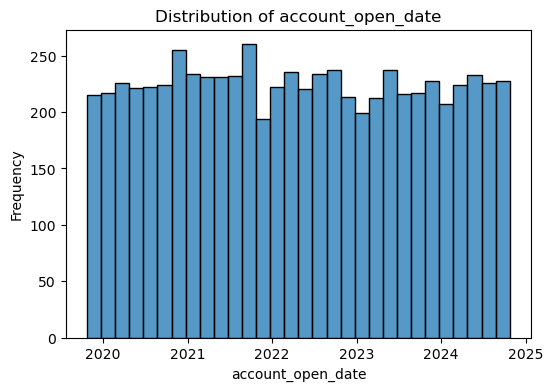

In [194]:
col = "account_open_date"
plt.figure(figsize=(6, 4))
sns.histplot(data[col], bins=30)
plt.title(f"Distribution of {col}")
plt.xlabel(f'{col}')
plt.ylabel('Frequency')
plt.show()

In [158]:
data["account_open_year"] = data["account_open_date"].dt.year
data["account_open_month"] = data["account_open_date"].dt.month
data["account_age_days"] = (pd.Timestamp("today") - data["account_open_date"]).dt.days
data["account_age_months"] = data["account_age_days"] // 30
data["account_age_years"] = data["account_age_days"] / 365.25

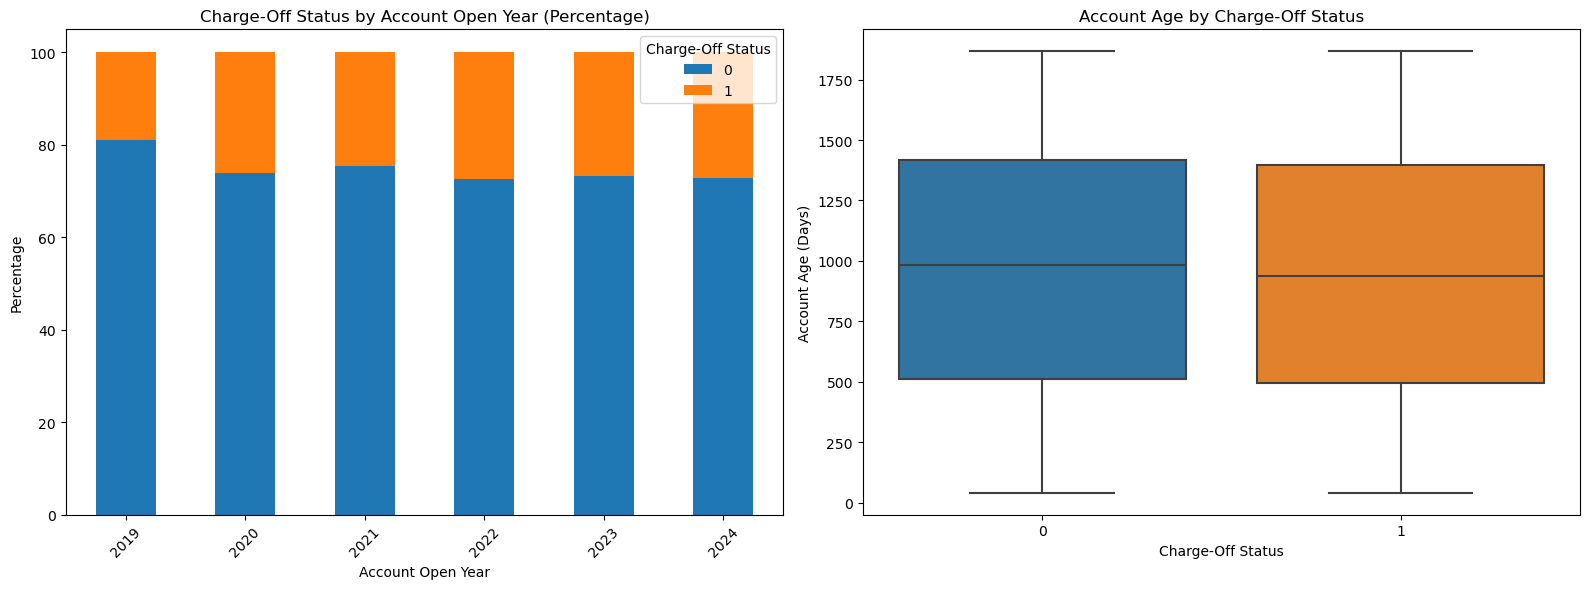

In [171]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

pivot_table = data.groupby(["account_open_year", "charge_off_status"]).size().unstack()
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
pivot_table_percentage.plot(kind="bar", stacked=True, ax=axes[0] )
axes[0].set_title("Charge-Off Status by Account Open Year (Percentage)")
axes[0].set_xlabel("Account Open Year")
axes[0].set_ylabel("Percentage")
axes[0].legend(title="Charge-Off Status")
axes[0].tick_params(axis='x', rotation=45)


sns.boxplot(x="charge_off_status", y="account_age_days", data=data, ax=axes[1])
axes[1].set_title("Account Age by Charge-Off Status")
axes[1].set_xlabel("Charge-Off Status")
axes[1].set_ylabel("Account Age (Days)")

plt.tight_layout()
plt.show()


- By observing the plots we can say that **Account Age** does not affect the **charge_off_status**

### 2.15 `Earliest_credit_account`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


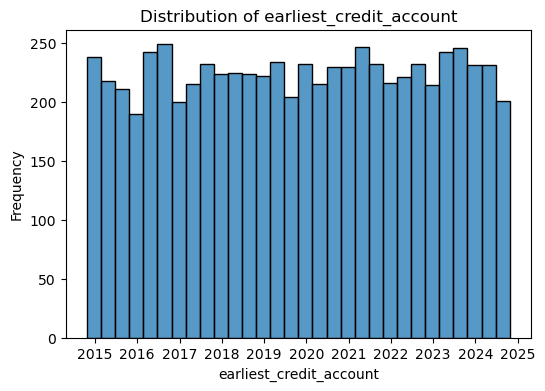

In [193]:
col = "earliest_credit_account"
plt.figure(figsize=(6, 4))
sns.histplot(data[col], bins=30)
plt.title(f"Distribution of {col}")
plt.xlabel(f'{col}')
plt.ylabel('Frequency')
plt.show()

In [174]:
data["earliest_credit_account_year"] = data["earliest_credit_account"].dt.year
data["earliest_credit_account_month"] = data["account_open_date"].dt.month
data["earliest_credit_account_age_days"] = (pd.Timestamp("today") - data["earliest_credit_account"]).dt.days
data["earliest_credit_account_age_months"] = data["earliest_credit_account_age_days"] // 30
data["earliest_credit_account_age_years"] = data["earliest_credit_account_age_days"] / 365.25

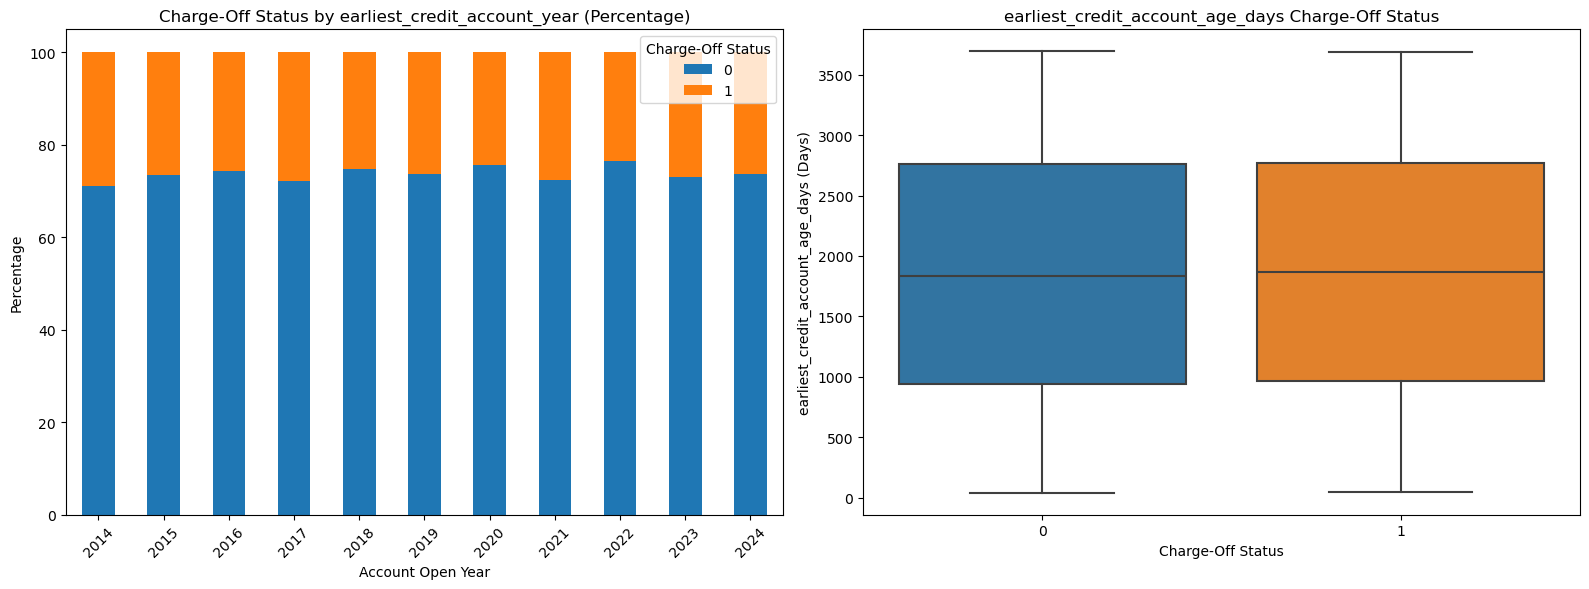

In [175]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

pivot_table = data.groupby(["earliest_credit_account_year", "charge_off_status"]).size().unstack()
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
pivot_table_percentage.plot(kind="bar", stacked=True, ax=axes[0] )
axes[0].set_title("Charge-Off Status by earliest_credit_account_year (Percentage)")
axes[0].set_xlabel("Account Open Year")
axes[0].set_ylabel("Percentage")
axes[0].legend(title="Charge-Off Status")
axes[0].tick_params(axis='x', rotation=45)


sns.boxplot(x="charge_off_status", y="earliest_credit_account_age_days", data=data, ax=axes[1])
axes[1].set_title("earliest_credit_account_age_days Charge-Off Status")
axes[1].set_xlabel("Charge-Off Status")
axes[1].set_ylabel("earliest_credit_account_age_days (Days)")

plt.tight_layout()
plt.show()

- By observing the plots we can say that **Earliest Credit Account Age** does not affect the **charge_off_status**

### 2.16 `Recent_trade_activity`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


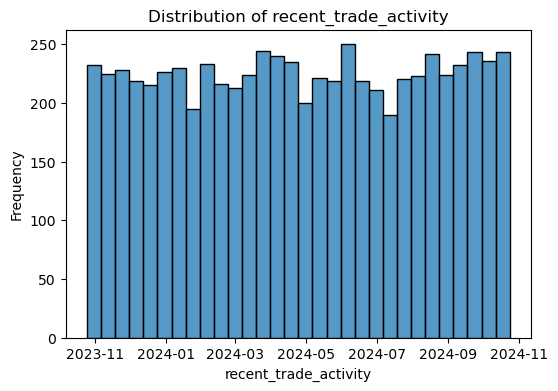

In [192]:
col = "recent_trade_activity"
plt.figure(figsize=(6, 4))
sns.histplot(data[col], bins=30)
plt.title(f"Distribution of {col}")
plt.xlabel(f'{col}')
plt.ylabel('Frequency')
plt.show()

In [176]:
data["recent_trade_activity_year"] = data["recent_trade_activity"].dt.year
data["recent_trade_activity_month"] = data["recent_trade_activity"].dt.month
data["recent_trade_activity_age_days"] = (pd.Timestamp("today") - data["recent_trade_activity"]).dt.days
data["recent_trade_activity_age_months"] = data["recent_trade_activity_age_days"] // 30
data["recent_trade_activity_age_years"] = data["recent_trade_activity_age_days"] / 365.25

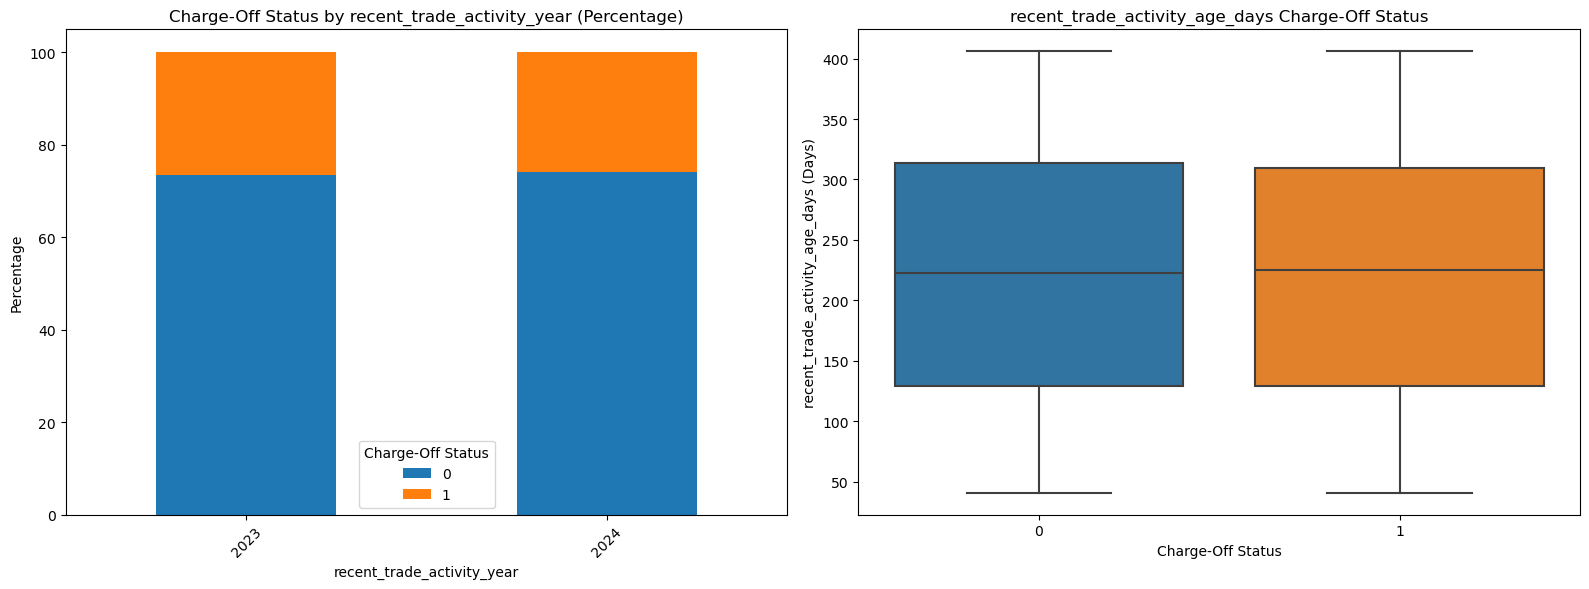

In [216]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

pivot_table = data.groupby(["recent_trade_activity_year", "charge_off_status"]).size().unstack()
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
pivot_table_percentage.plot(kind="bar", stacked=True, ax=axes[0] )
axes[0].set_title("Charge-Off Status by recent_trade_activity_year (Percentage)")
axes[0].set_xlabel("recent_trade_activity_year")
axes[0].set_ylabel("Percentage")
axes[0].legend(title="Charge-Off Status")
axes[0].tick_params(axis='x', rotation=45)


sns.boxplot(x="charge_off_status", y="recent_trade_activity_age_days", data=data, ax=axes[1])
axes[1].set_title("recent_trade_activity_age_days Charge-Off Status")
axes[1].set_xlabel("Charge-Off Status")
axes[1].set_ylabel("recent_trade_activity_age_days (Days)")

plt.tight_layout()
plt.show()

- By observing the plots we can say that **Recent Trade Activity Age** does not affect the **charge_off_status**

### 2.17 `Payment_methods_high_risk`

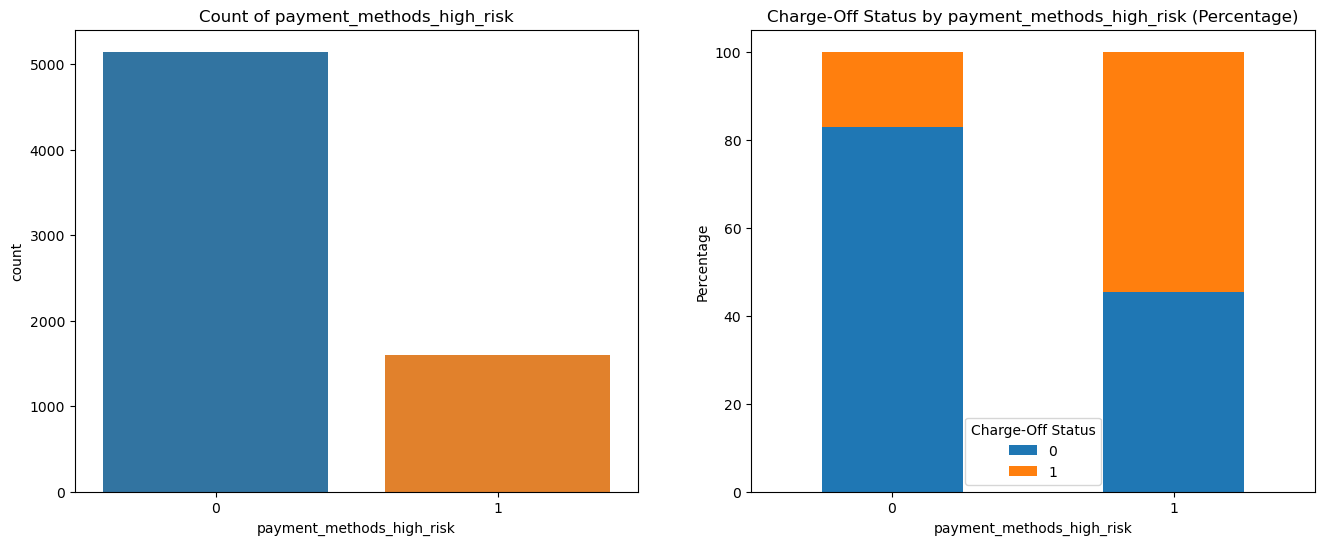

In [226]:
col= "payment_methods_high_risk"

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x=col, data=data,ax=axes[0])
axes[0].set_title(f"Count of {col}")

pivot_table = data.groupby(["payment_methods_high_risk", "charge_off_status"]).size().unstack()
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
pivot_table_percentage.plot(kind="bar", stacked=True, ax=axes[1] )
axes[1].set_title("Charge-Off Status by payment_methods_high_risk (Percentage)")
axes[1].set_xlabel("payment_methods_high_risk")
axes[1].set_ylabel("Percentage")
axes[1].legend(title="Charge-Off Status")
axes[1].tick_params(axis='x', rotation=0)

plt.show()

### 2.18 `Multiple_applications_short_time_period`

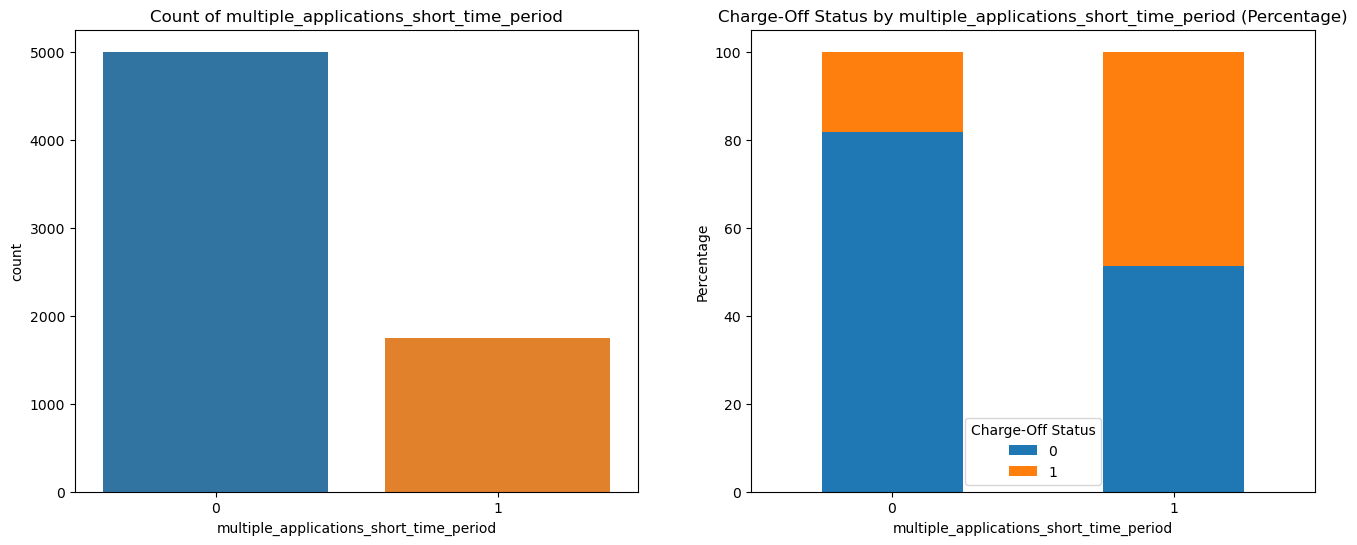

In [227]:
col= "multiple_applications_short_time_period"

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x=col, data=data,ax=axes[0])
axes[0].set_title(f"Count of {col}")

pivot_table = data.groupby(["multiple_applications_short_time_period", "charge_off_status"]).size().unstack()
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
pivot_table_percentage.plot(kind="bar", stacked=True, ax=axes[1] )
axes[1].set_title("Charge-Off Status by multiple_applications_short_time_period (Percentage)")
axes[1].set_xlabel("multiple_applications_short_time_period")
axes[1].set_ylabel("Percentage")
axes[1].legend(title="Charge-Off Status")
axes[1].tick_params(axis='x', rotation=0)

plt.show()

### 2.19 `Unusual_submission_pattern`

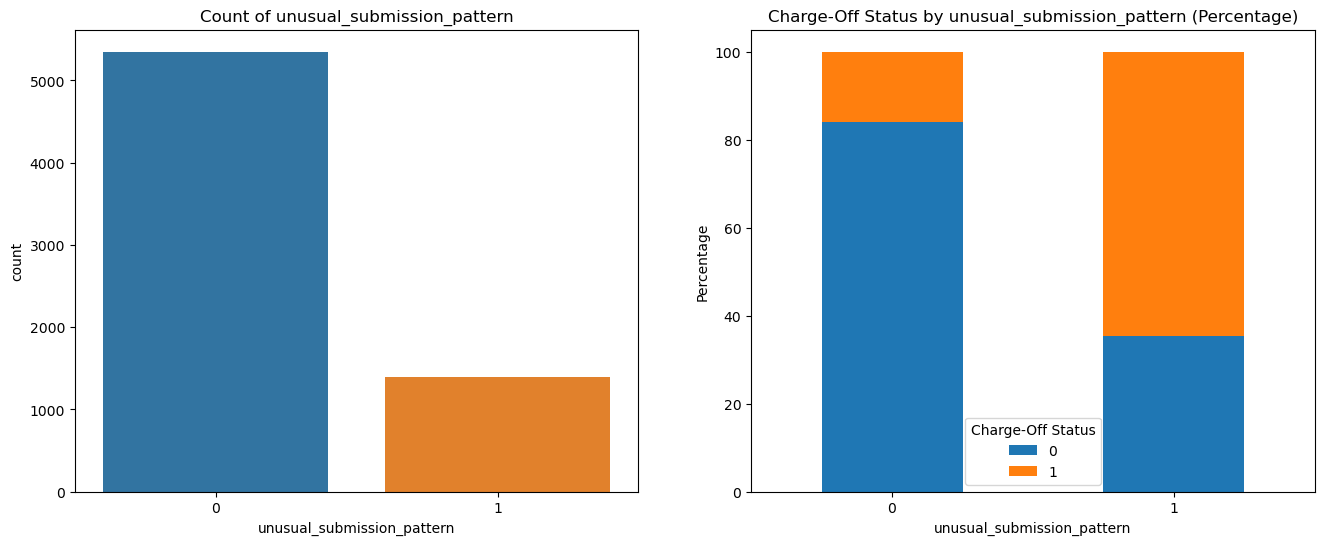

In [228]:
col= "unusual_submission_pattern"

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x=col, data=data,ax=axes[0])
axes[0].set_title(f"Count of {col}")

pivot_table = data.groupby([col, "charge_off_status"]).size().unstack()
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
pivot_table_percentage.plot(kind="bar", stacked=True, ax=axes[1] )
axes[1].set_title(f"Charge-Off Status by {col} (Percentage)")
axes[1].set_xlabel(col)
axes[1].set_ylabel("Percentage")
axes[1].legend(title="Charge-Off Status")
axes[1].tick_params(axis='x', rotation=0)

plt.show()

### 2.20 `Applications_submitted_during_odd_hours`

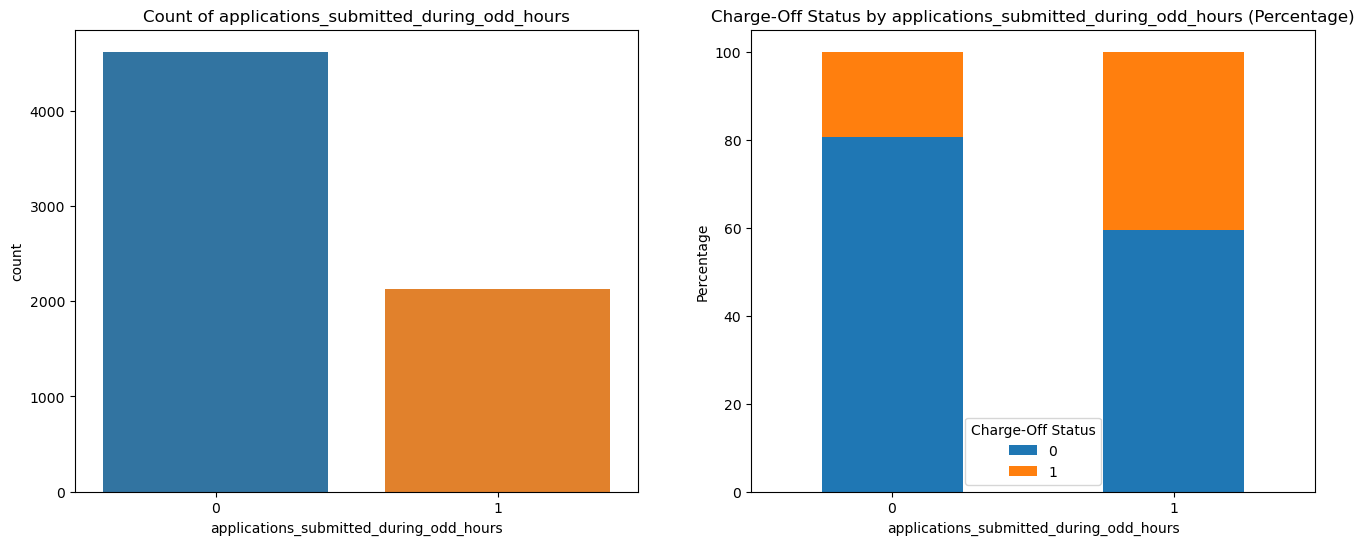

In [229]:
col= "applications_submitted_during_odd_hours"

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x=col, data=data,ax=axes[0])
axes[0].set_title(f"Count of {col}")

pivot_table = data.groupby([col, "charge_off_status"]).size().unstack()
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
pivot_table_percentage.plot(kind="bar", stacked=True, ax=axes[1] )
axes[1].set_title(f"Charge-Off Status by {col} (Percentage)")
axes[1].set_xlabel(col)
axes[1].set_ylabel("Percentage")
axes[1].legend(title="Charge-Off Status")
axes[1].tick_params(axis='x', rotation=0)

plt.show()

### 2.21 `Watchlist_blacklist_flag`

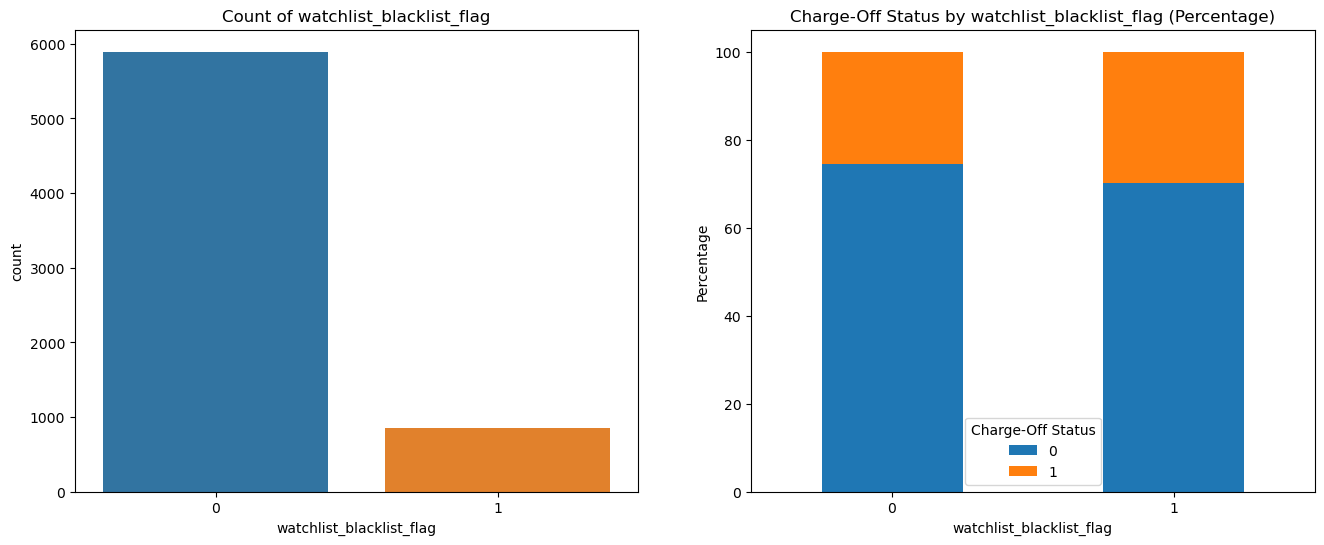

In [230]:
col= "watchlist_blacklist_flag"

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x=col, data=data,ax=axes[0])
axes[0].set_title(f"Count of {col}")

pivot_table = data.groupby([col, "charge_off_status"]).size().unstack()
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
pivot_table_percentage.plot(kind="bar", stacked=True, ax=axes[1] )
axes[1].set_title(f"Charge-Off Status by {col} (Percentage)")
axes[1].set_xlabel(col)
axes[1].set_ylabel("Percentage")
axes[1].legend(title="Charge-Off Status")
axes[1].tick_params(axis='x', rotation=0)

plt.show()

### 2.22 `Public_records_flag`

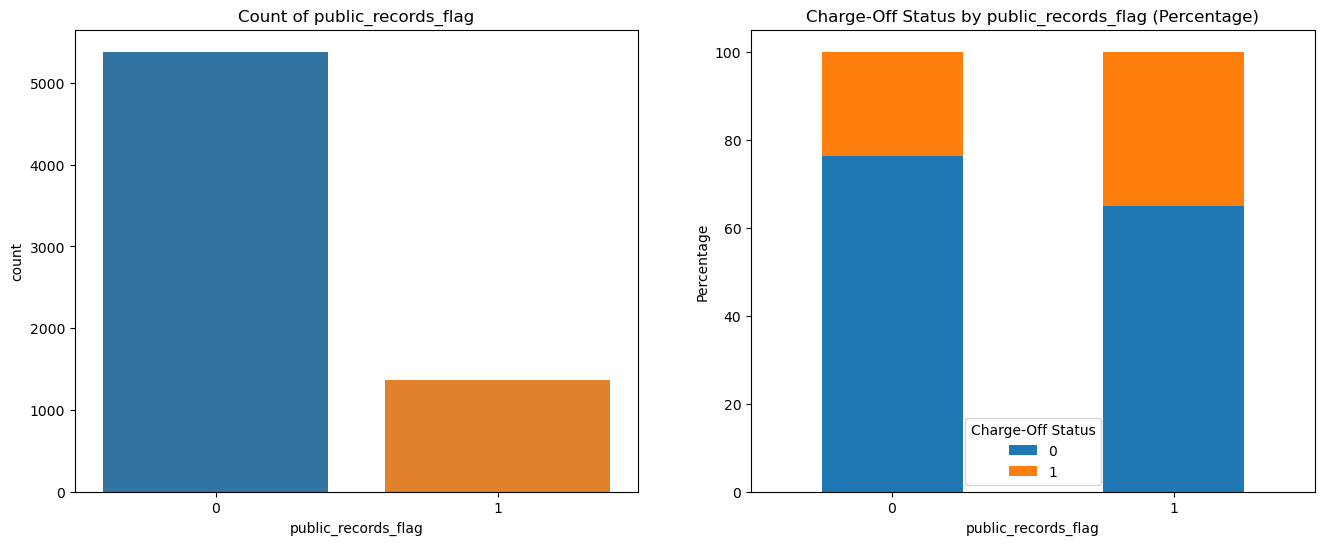

In [231]:
col= "public_records_flag"

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x=col, data=data,ax=axes[0])
axes[0].set_title(f"Count of {col}")

pivot_table = data.groupby([col, "charge_off_status"]).size().unstack()
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
pivot_table_percentage.plot(kind="bar", stacked=True, ax=axes[1] )
axes[1].set_title(f"Charge-Off Status by {col} (Percentage)")
axes[1].set_xlabel(col)
axes[1].set_ylabel("Percentage")
axes[1].legend(title="Charge-Off Status")
axes[1].tick_params(axis='x', rotation=0)

plt.show()

## 3. Correlation Analysis 

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


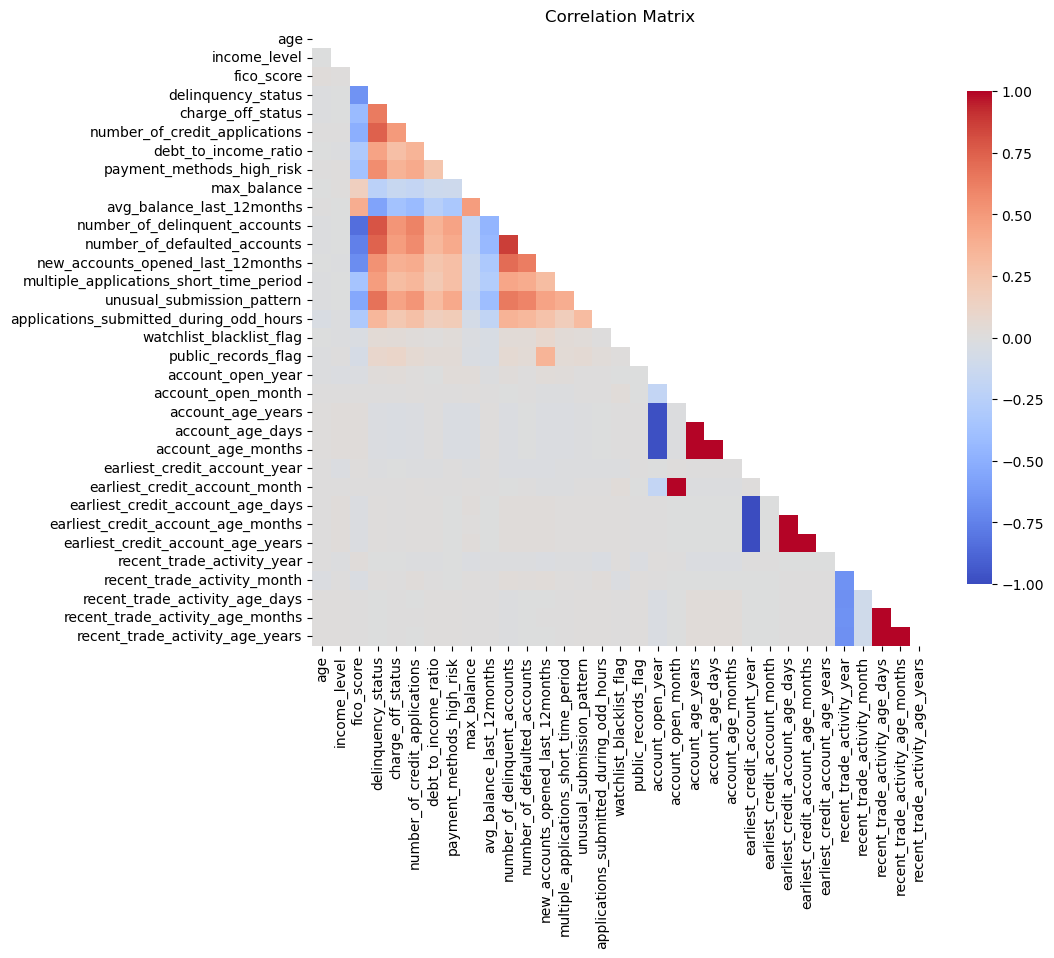

In [233]:
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.show()